About Dataset

Problem Statement
You are working as a data scientist in a global finance company. Over the years, the company has collected basic bank details and gathered a lot of credit-related information.
The management wants to build an intelligent system to segregate the people into credit score brackets to reduce the manual efforts.


In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
import statsmodels.api as sm
from scipy import stats
import imblearn


from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer, StandardScaler, PowerTransformer, OrdinalEncoder

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier, SGDClassifier, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

import warnings 
warnings.filterwarnings("ignore")

plt.rcParams["figure.figsize"] = (16,12)

In [209]:
df_train = pd.read_csv('train.csv', low_memory=False)
df_test = pd.read_csv('test.csv', low_memory=False)

print('Training dataset shape: ', df_train.shape, 'Test dataset shape: ', df_test.shape)

Training dataset shape:  (100000, 28) Test dataset shape:  (50000, 27)


In [210]:
pd.set_option('display.max_columns', None)
df_train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [211]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [212]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


<AxesSubplot:>

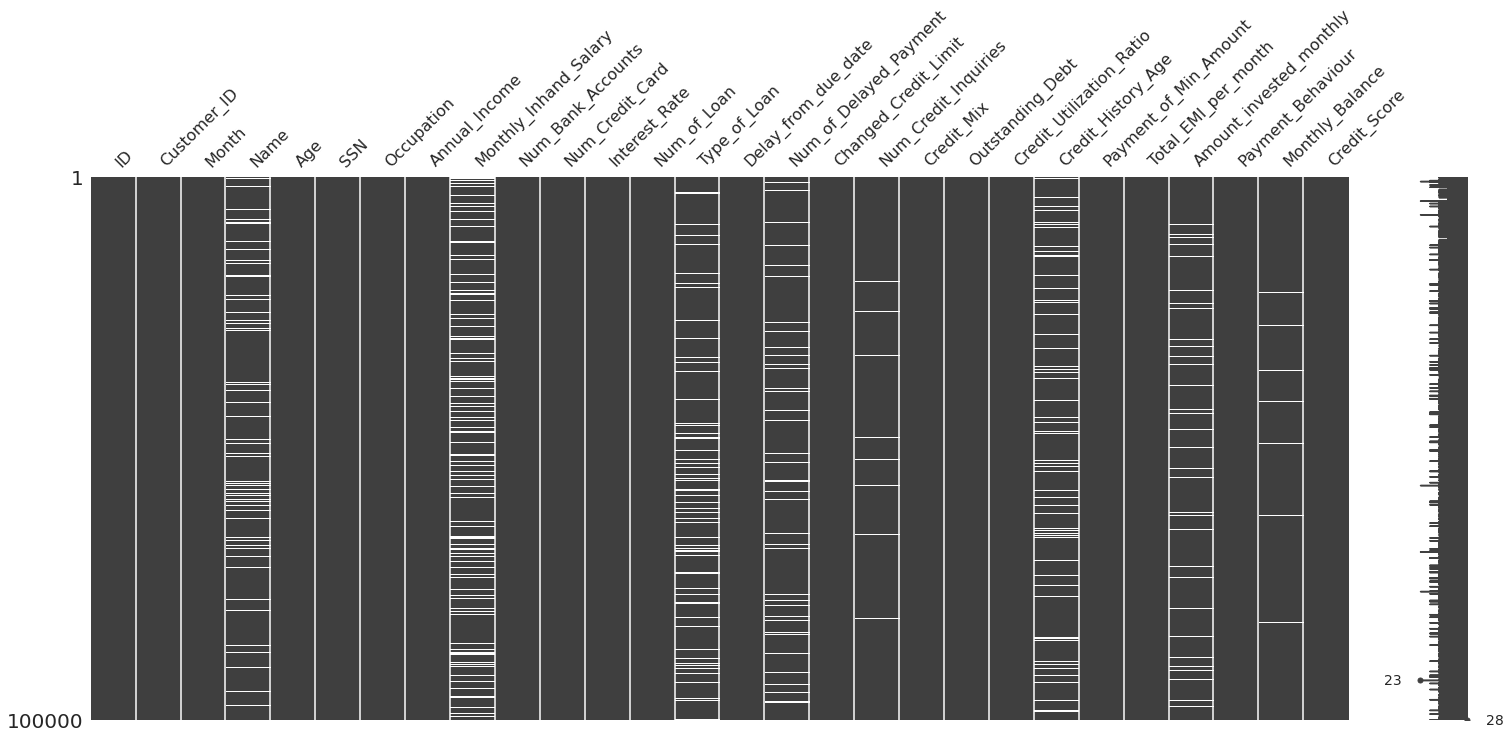

In [213]:
# Visual representation of the missing values in the dataset.
msno.matrix(df_train)

In [214]:
# The percentage of the missing value by column.
(df_train.isnull().mean() * 100).sort_values()

ID                           0.000
Payment_Behaviour            0.000
Total_EMI_per_month          0.000
Payment_of_Min_Amount        0.000
Credit_Utilization_Ratio     0.000
Outstanding_Debt             0.000
Credit_Mix                   0.000
Changed_Credit_Limit         0.000
Delay_from_due_date          0.000
Num_of_Loan                  0.000
Interest_Rate                0.000
Credit_Score                 0.000
Num_Bank_Accounts            0.000
Annual_Income                0.000
Occupation                   0.000
SSN                          0.000
Age                          0.000
Month                        0.000
Customer_ID                  0.000
Num_Credit_Card              0.000
Monthly_Balance              1.200
Num_Credit_Inquiries         1.965
Amount_invested_monthly      4.479
Num_of_Delayed_Payment       7.002
Credit_History_Age           9.030
Name                         9.985
Type_of_Loan                11.408
Monthly_Inhand_Salary       15.002
dtype: float64

In [215]:
df_train.duplicated().sum()

0

## EDA

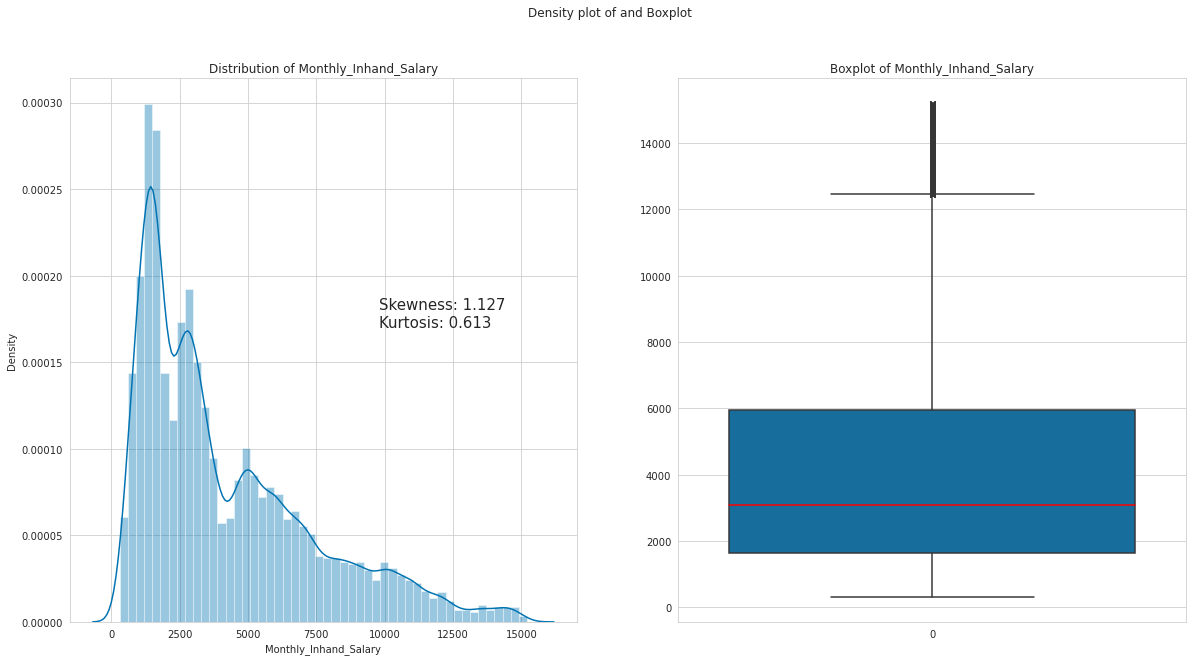

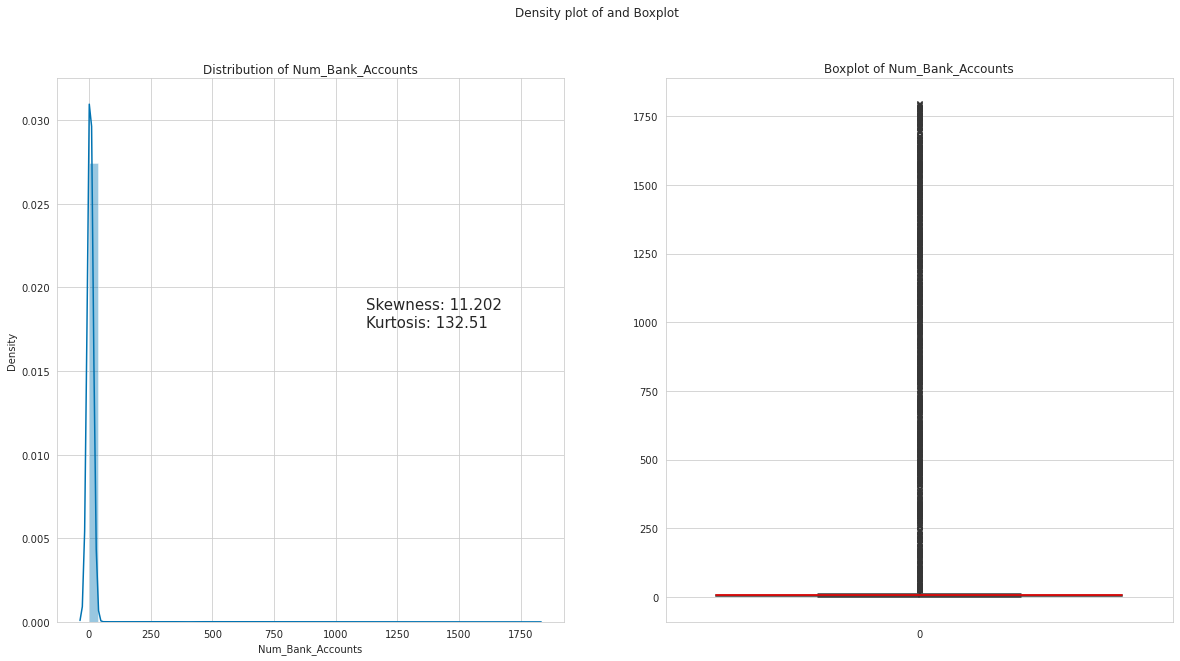

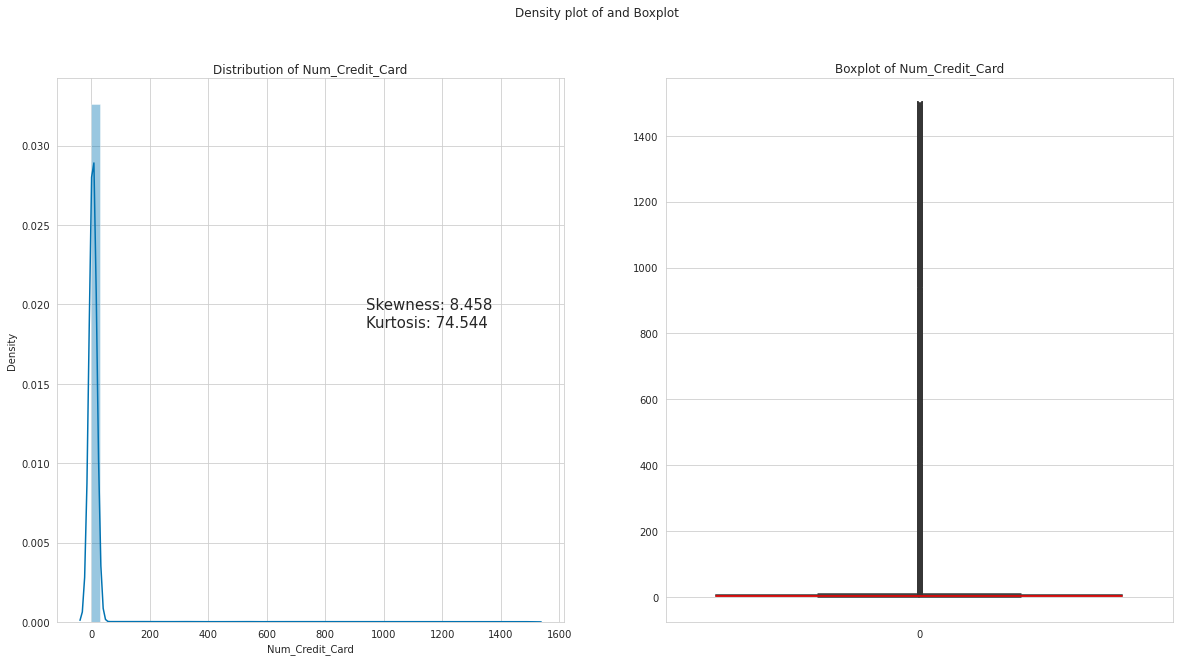

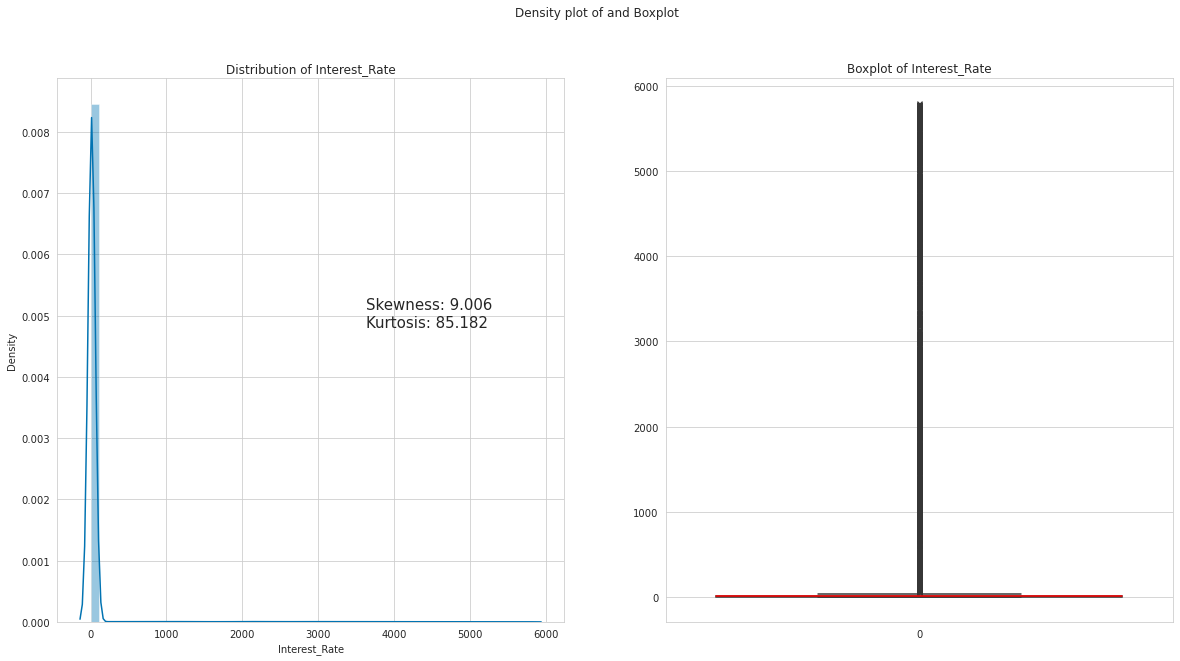

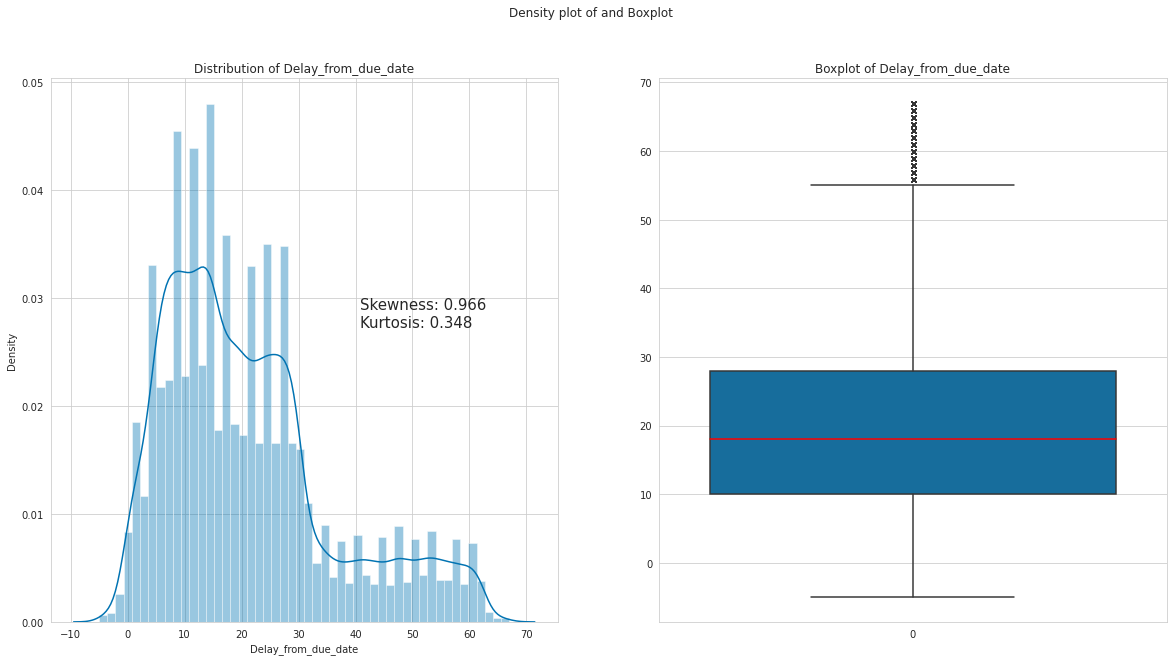

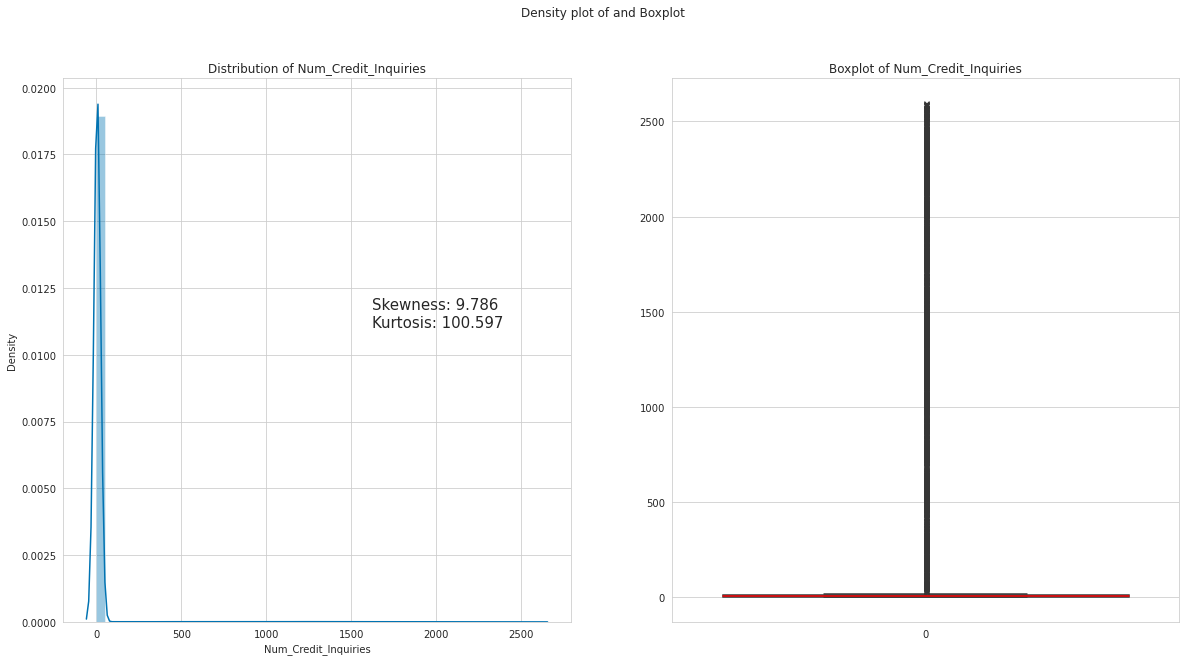

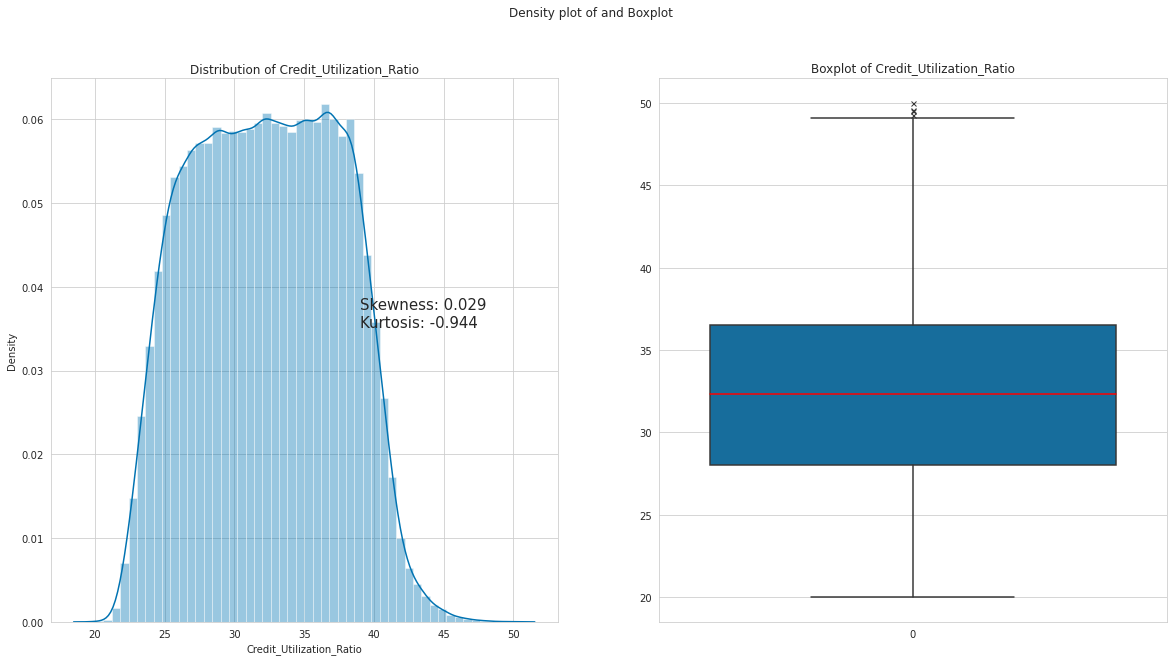

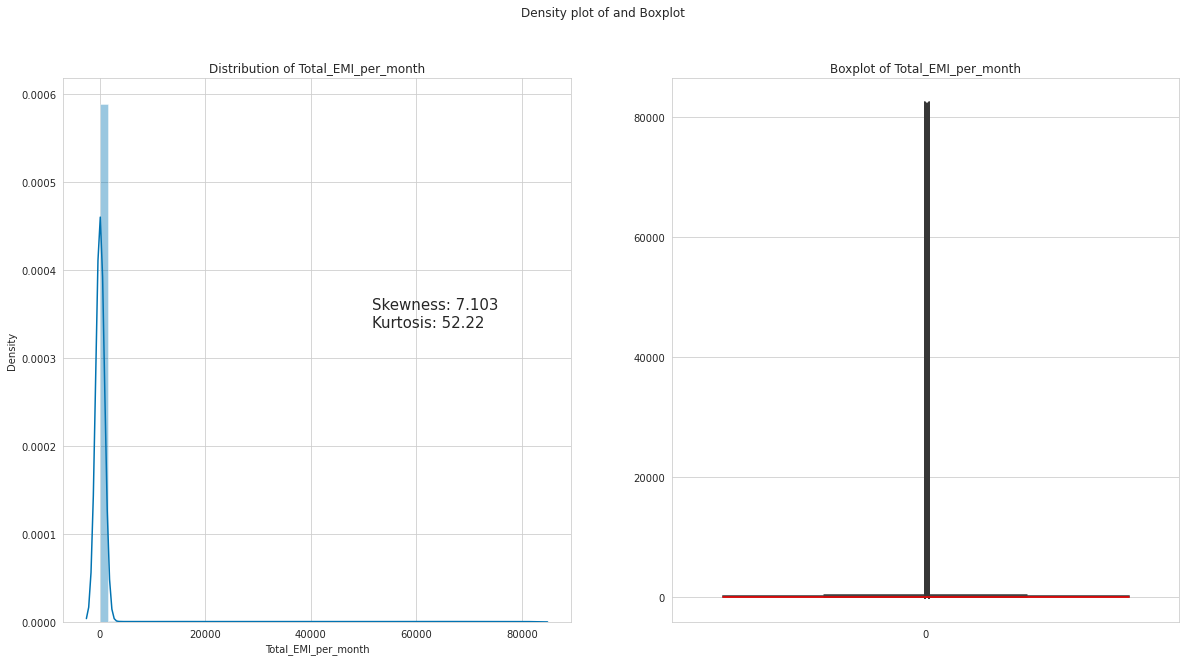

In [216]:
for col in df_train.select_dtypes(include='number').columns:
      plt.figure(figsize=(20,10))
      plt.subplot(121)
      sns.distplot(df_train[col])
      plt.title('Distribution of ' + col)
      plt.subplot(122)
      sns.boxplot(df_train[col],
                  medianprops={"color": "red"},
                  flierprops={"marker": "x"})
      plt.title('Boxplot of ' + col)
      plt.suptitle('Density plot of and Boxplot')
      text = '''
            Skewness: {0}
            Kurtosis: {1}
             '''.format(round(df_train[col].skew(), 3), round(df_train[col].kurtosis(),3))
      plt.figtext(0.3, 0.6, text, horizontalalignment='left', verticalalignment='top', fontsize = 15)
      plt.show()

The numerical features are heavily skewed and there are many outliers.

In [217]:
df_train['Occupation'].value_counts()

_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64

<AxesSubplot:xlabel='Occupation'>

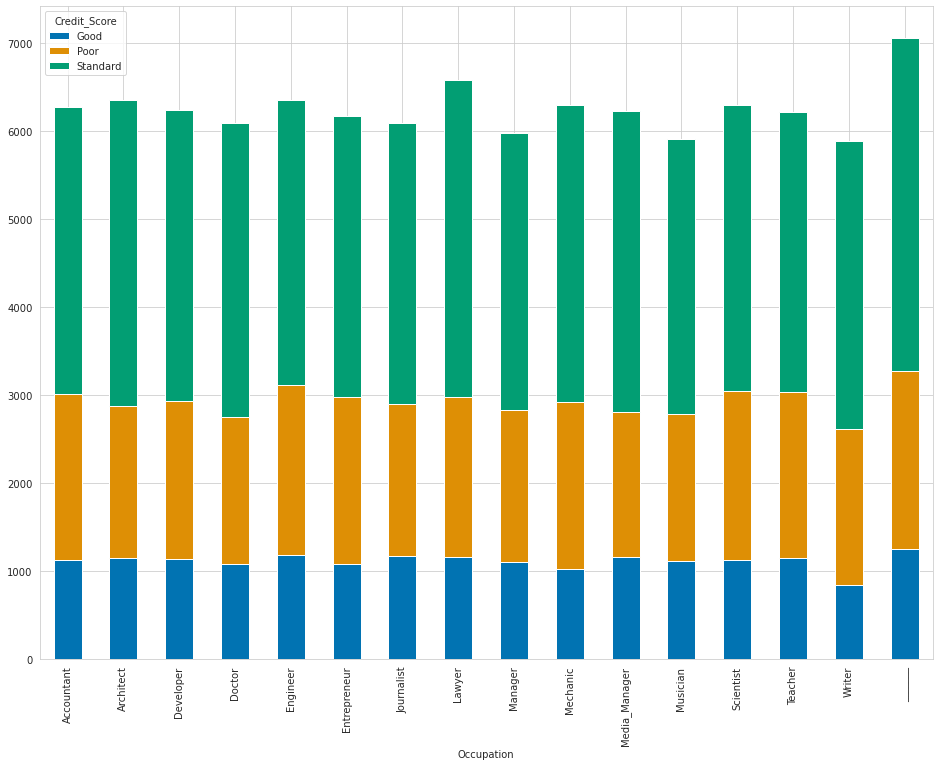

In [218]:
sns.set_style('whitegrid')
sns.set_palette('colorblind')
pd.crosstab(df_train['Occupation'], df_train['Credit_Score']).plot(kind = 'bar', stacked = True)

The credit score distribution amond the occupation seems nearly balanced. However there is one non existing occupation that need to be handled when cleaning the data.

In [219]:
df_train['Month'].value_counts()

January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: Month, dtype: int64

The records are from January to August with an even number of observation in each month. It means that there are 12500 customers and each of them has exactly eight month of records.

In [220]:
df_train['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: Payment_Behaviour, dtype: int64

<AxesSubplot:xlabel='Payment_Behaviour'>

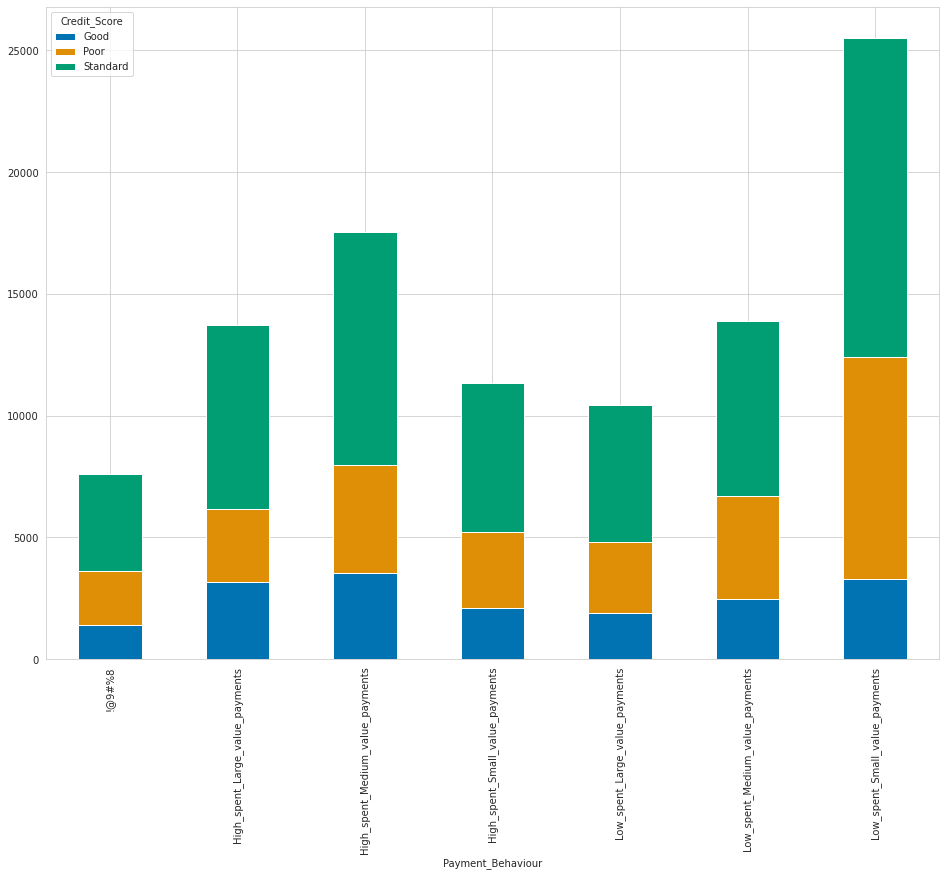

In [221]:
pd.crosstab(df_train['Payment_Behaviour'], df_train['Credit_Score']).plot(kind = 'bar', stacked = True)


There are six categoris for transactino behavior and one extra impractical that need to be handled.

In [222]:
df_train['Payment_of_Min_Amount'].value_counts()


Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64

In [223]:
df_train['Credit_Mix'].value_counts()

Standard    36479
Good        24337
_           20195
Bad         18989
Name: Credit_Mix, dtype: int64

In [224]:
df_train['Credit_History_Age'].head(n=10)

0    22 Years and 1 Months
1                      NaN
2    22 Years and 3 Months
3    22 Years and 4 Months
4    22 Years and 5 Months
5    22 Years and 6 Months
6    22 Years and 7 Months
7                      NaN
8    26 Years and 7 Months
9    26 Years and 8 Months
Name: Credit_History_Age, dtype: object

In [225]:
df_train['Credit_Score'].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

<AxesSubplot:xlabel='Credit_Mix'>

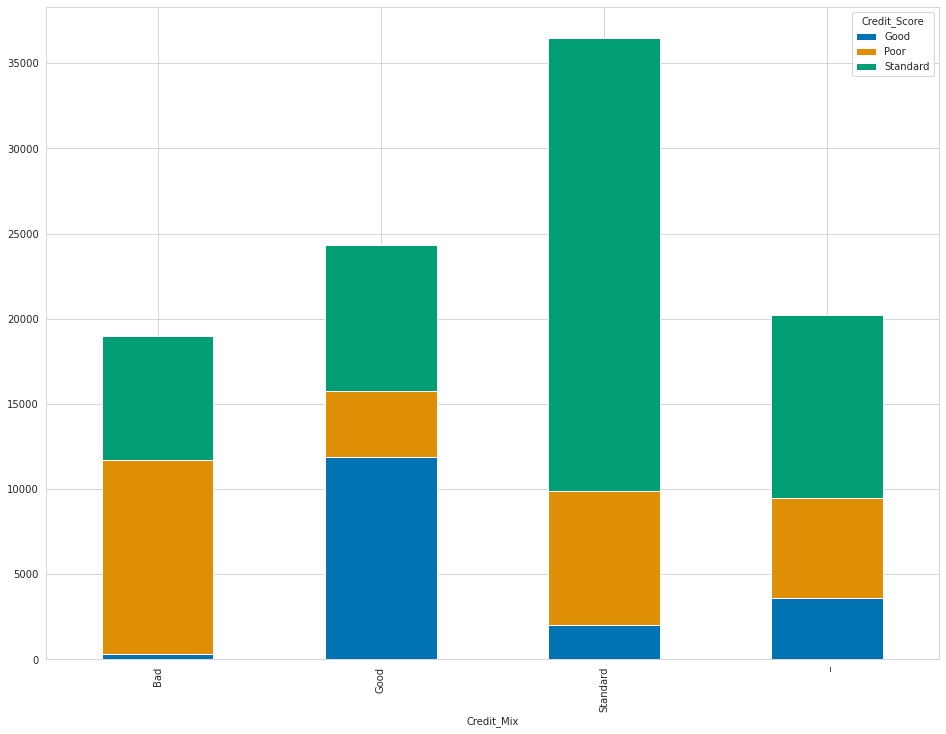

In [226]:
pd.crosstab(df_train['Credit_Mix'], df_train['Credit_Score']).plot(kind = 'bar', stacked = True)

The credit score is heavily imbalanced. This means that we have to do oversampling to balance the target variable so that is won't cause bias during the modelling process.

There are many issues with the dataset that was explored during the EDA.
- There are columns that not necessary for our analysis hence we can remove them.
- Variables are in the wrong type. Many numerical type present as strings. They need to be cleaned as well.
- Many missing data present that needs to be handled.
- Outliers need to be treated. Also the zeros and negative values where necessary needs correction.
- Categorical data needs to be encoded.
- Data cleanning with the removal of unecessary characters.
- Converting credit history age to be in month and converting.
- Balancing the target variable.
- Transforming data to be Gaussian like.

## Data Cleaning

In [227]:
# Dropping unnecessary columns.
df_train.drop(['ID','Name', 'SSN'], inplace = True, axis = 1)

In [228]:
# Replacing in each column the underscores with NaN's.
for col in df_train.columns:
    # Replacing values where there is only underscore or random characters.
    df_train[col] = df_train[col].replace(['_','!@9#%8'],np.nan)
    # Stripping underscores from values if there is any in it.
    if df_train[col].dtypes == object:
        df_train[col] = df_train[col].str.strip('_')
df_train.isna().sum().sort_values()

Customer_ID                     0
Total_EMI_per_month             0
Payment_of_Min_Amount           0
Credit_Utilization_Ratio        0
Outstanding_Debt                0
Delay_from_due_date             0
Num_of_Loan                     0
Interest_Rate                   0
Credit_Score                    0
Num_Bank_Accounts               0
Annual_Income                   0
Occupation                      0
Age                             0
Month                           0
Num_Credit_Card                 0
Monthly_Balance              1200
Num_Credit_Inquiries         1965
Changed_Credit_Limit         2091
Amount_invested_monthly      4479
Num_of_Delayed_Payment       7002
Payment_Behaviour            7600
Credit_History_Age           9030
Type_of_Loan                11408
Monthly_Inhand_Salary       15002
Credit_Mix                  20195
dtype: int64

Helper functions

In [229]:
# Defining function that determines the upper and lower limits of a variable for outlier handling
def outlierTreat(col):
    twenty_fifth = df_train[col].quantile(0.25)
    seventy_fifth = df_train[col].quantile(0.75)

    iqr_range = seventy_fifth - twenty_fifth

    upper_limit = round(seventy_fifth + (1.5 * iqr_range))
    lower_limit = twenty_fifth - (1.5 * iqr_range)
    lower_limit = (0 if lower_limit < 0 else lower_limit)

    df_train.loc[df_train[col] > upper_limit, col] = np.NaN
    df_train.loc[df_train[col] < lower_limit, col] = np.NaN

# Function that imputes data for a customer where inconsistent data is present
def groupImputer(col):
    grped_df = df_train.groupby('Customer_ID')[col]
    df_dict = {}
    for id, group in grped_df:
        new_grp = group.fillna(method = 'ffill').fillna(method = 'bfill')
        kv = {id : new_grp}
        df_dict.update(kv)

    for key, value in df_dict.items():
        val = pd.DataFrame(value)
        for i in val.iterrows():
            id = i[0]
            value = i[1][0]
            df_train.loc[df_train.index == id, col] = value

def groupImputer_mode(col):
    grp_mode = df_train.groupby('Customer_ID')[col].transform(lambda x: x.mode().iat[0])
    df_train[col] = df_train[col].fillna(grp_mode)

def histPlotByCol(col):
    df_train[col].hist(bins = 30, color = 'darkorange')
    plt.xlabel(f'{col}')
    plt.ylabel('Number of observations')
    plt.show()

def countPlotByCol(col):
    sns.countplot(data = df_train, x = col)
    plt.xlabel(f'{col}')
    plt.ylabel('Number of observations')
    plt.show()

### Credit Mix cleaning

In [230]:
df_train['Credit_Mix'] = df_train['Credit_Mix'].replace(np.NaN, 'Unknown')
df_train['Credit_Mix'].value_counts()

Standard    36479
Good        24337
Unknown     20195
Bad         18989
Name: Credit_Mix, dtype: int64

The underscores have been replaced with an "Unknown" category.

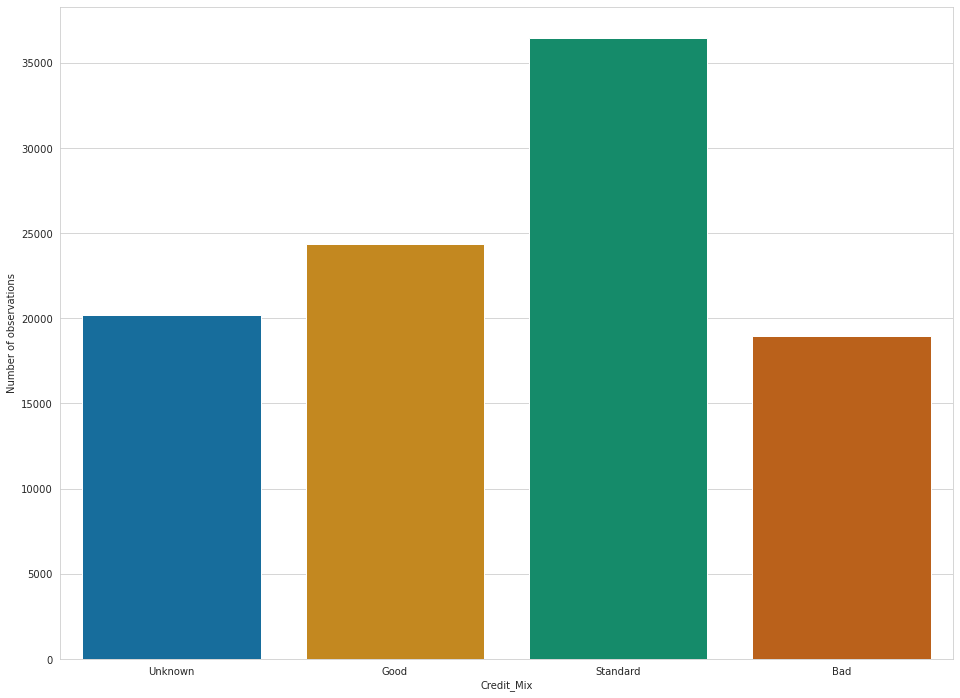

In [231]:
countPlotByCol('Credit_Mix')

### Age cleaning

We can assume that age values above 100 are outliers and false data.

In [232]:
# Remove anything that is not a digit from the Age column.
df_train['Age'] = df_train['Age'].str.replace(r'\D+','')

# Convert the variable to int
df_train['Age'] = df_train['Age'].astype('int')

In [233]:
age = df_train[df_train['Age'] <= 100]['Age'].value_counts()
age.tail()

14     1175
56      362
95        3
99        1
100       1
Name: Age, dtype: int64

The age normally is between 0 and 100 so everything above is treated as not valuable information.   
We also know that every customer has 8 month of recordings so the ages 95, 99 and 100 seems also outlier, possibly not right so we replace these values also.   
Grouping each customer and imputing possibly it's real age.

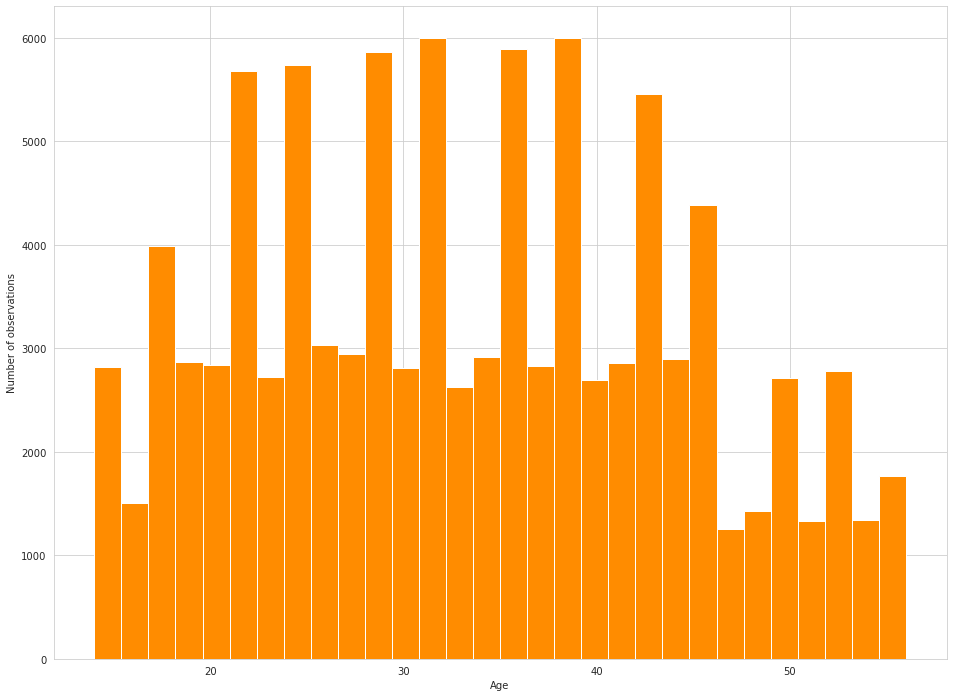

In [234]:
# Subset those rows where we have age more then 80 years and replacing them with NaNs.
df_train.loc[df_train['Age'] >=80, 'Age'] = np.NaN

# Groupping the customers and imputing their real age.
groupImputer_mode('Age')
histPlotByCol('Age')

### Occupation cleaning

Replacing the underscores from the Occupation column and than cheking the number of recods for each customer.

In [235]:
df_train['Occupation'] = df_train['Occupation'].replace('', np.nan)
grpd_month = df_train.groupby('Customer_ID')['Month'].count()
grpd_month.value_counts()

8    12500
Name: Month, dtype: int64

All of the customers have 8 months of records from January to August. Now subsetting this for only the missing values and grouping them again.    
If there is a customer with 8 month of missing values from the Occupation then we can be sure that it has never given any details before, otherwise we can use the Occupation that has been assigned to that customer once and we don't need to guess.   
We make the assumption that during that 8 months the occupation of the customer hasn't changed.

In [236]:
missing_occupation = df_train[df_train['Occupation'].isna()]
missing_occupation = missing_occupation.groupby('Customer_ID')['Month'].count()
missing_occupation.value_counts()

1    4248
2    1113
3     169
4      19
5       1
Name: Month, dtype: int64

It seems that there is no customer with 8 months of missing records hence all the customers have previous data for their Occupation and we don't have to guess.

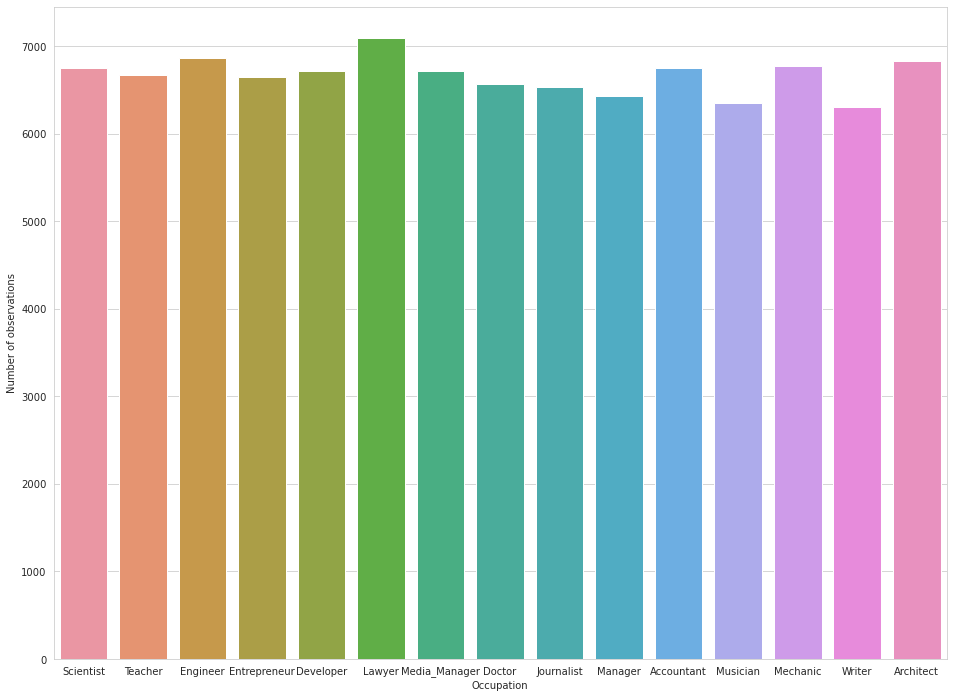

In [237]:
# Get all the customer IDs from the dataset
'''
cust_id = df_train['Customer_ID'].unique()
cust_occupation = {}

# Creating a dictionary for each customer id with their occupation.
for id in cust_id:
    cust = df_train.query(f'Customer_ID == "{id}"')['Occupation'].reset_index()
    cust = cust.dropna()
    occupation = cust['Occupation'].unique().item()
    key_value = {id : occupation}
    cust_occupation.update(key_value)
    
# Imputing the missing values based on the Customer ID
for key, value in cust_occupation.items():
    df_train.loc[df_train['Customer_ID'] == key, 'Occupation'] = value
    '''

groupImputer_mode('Occupation')
countPlotByCol('Occupation')

### Annual Income cleaning

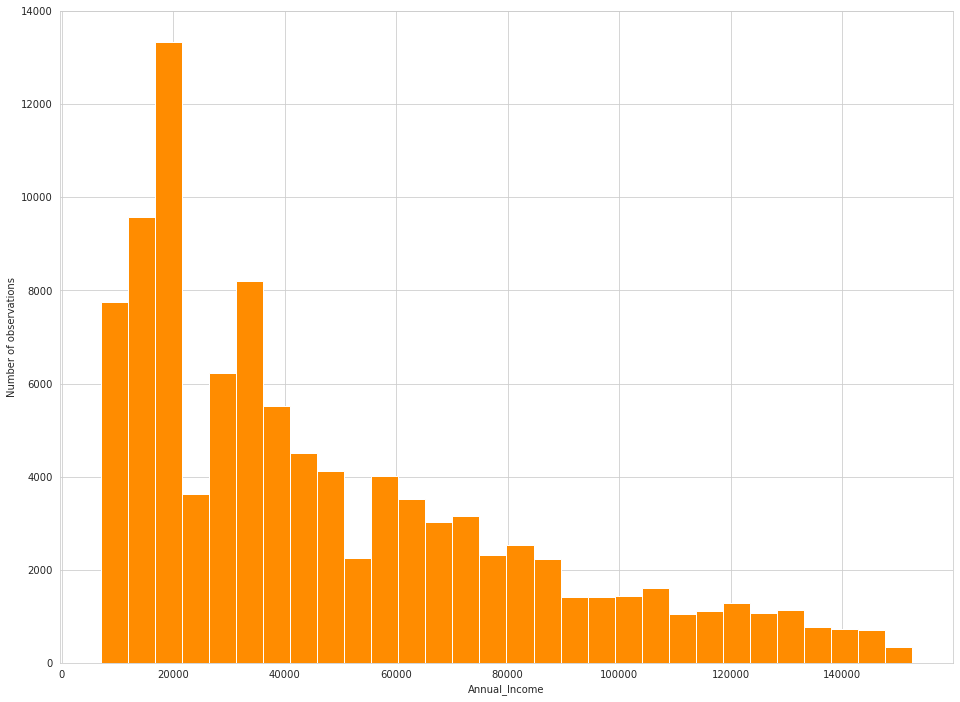

In [238]:
# Convert to float
df_train['Annual_Income'] = df_train['Annual_Income'].astype('float64')

# Remove outliers and impute by customer
outlierTreat('Annual_Income')
groupImputer('Annual_Income')

# Impute the mean for customers where data has been removed and couldn't impute anything at the first time
df_train_AnnInc = pd.DataFrame(df_train['Annual_Income'])
iter_imputer = IterativeImputer()
df_train_AnnInc = pd.DataFrame(iter_imputer.fit_transform(df_train_AnnInc))
df_train['Annual_Income'] = df_train_AnnInc

histPlotByCol('Annual_Income')

### Monthly Inhand Salary cleaning

Customers Monthly Inhand Salary salary is consistent and we assume that it hasn't changed during that 8 months period. We simply impute the monthly salary by customer based on their existing one hence avoiding any inconsistency.

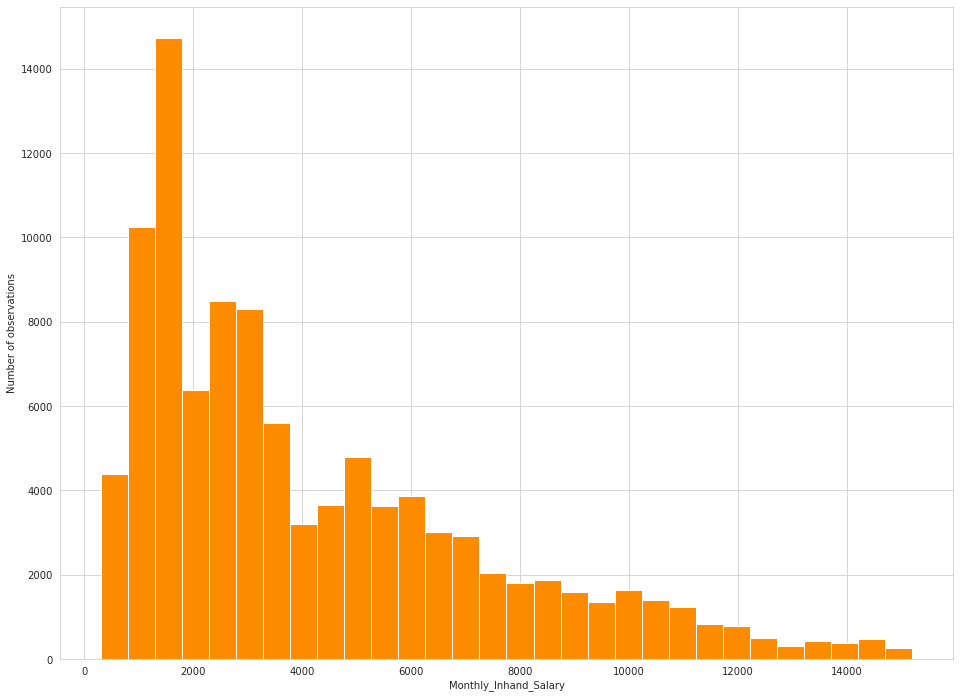

In [239]:
groupImputer_mode('Monthly_Inhand_Salary')

histPlotByCol('Monthly_Inhand_Salary')

### Number of Bank Accounts cleaning

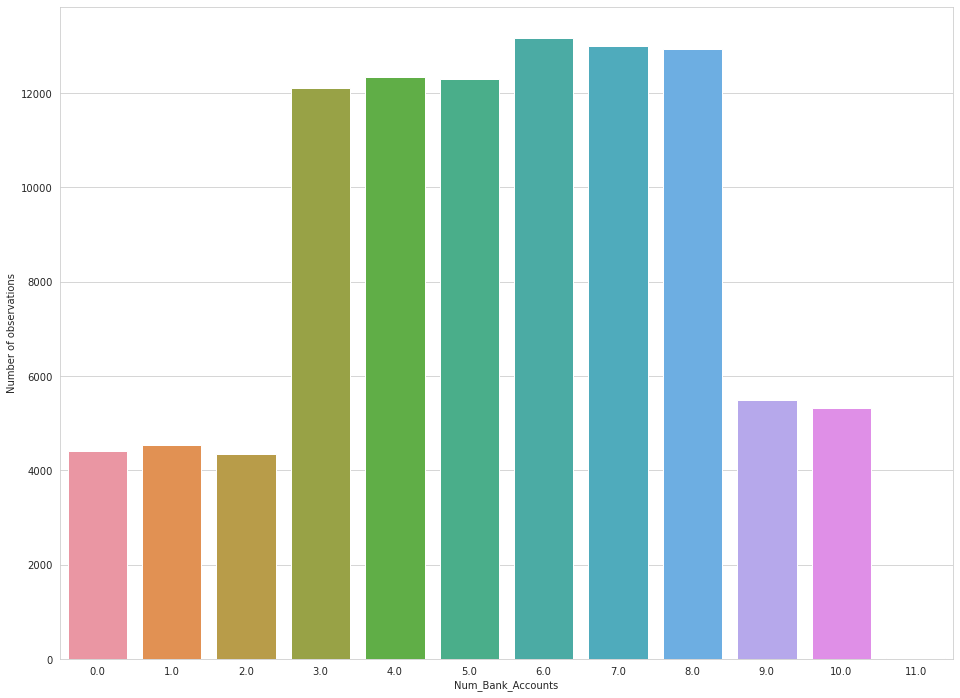

In [240]:
# Removing the outliers and replacing them with NaNs
outlierTreat('Num_Bank_Accounts')

# Imputing the most frequent number of accounts
groupImputer_mode('Num_Bank_Accounts')

# Countplot
countPlotByCol('Num_Bank_Accounts')

### Number of Credit Card

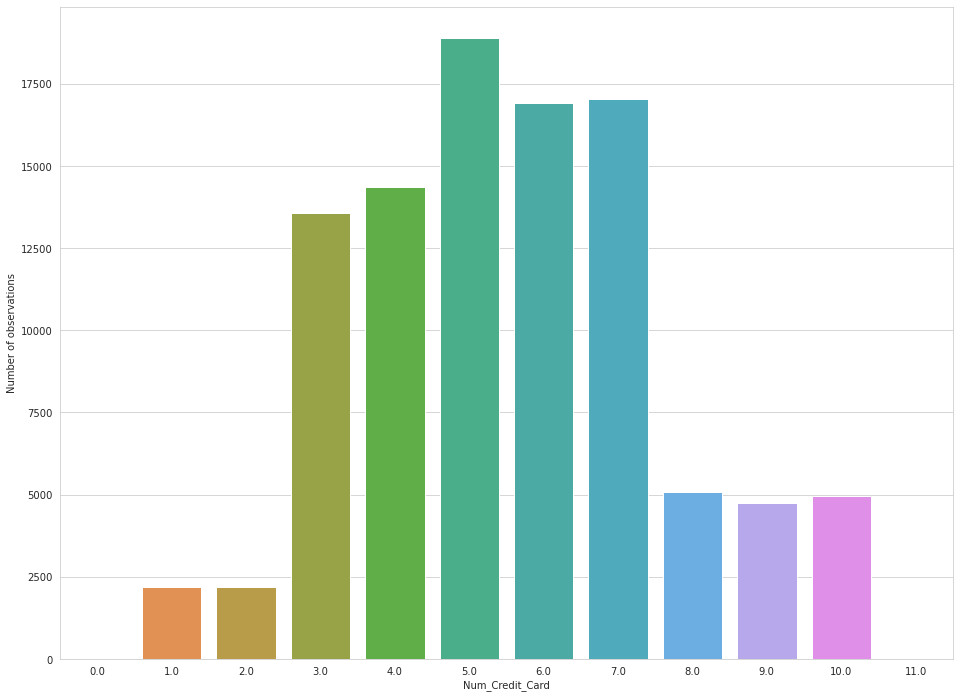

In [241]:
# Removing the outliers and replacing them with NaNs
outlierTreat('Num_Credit_Card')

# Imputing the most frequent number of accounts
groupImputer_mode('Num_Credit_Card')

# Countplot
countPlotByCol('Num_Credit_Card')

### Interest Rate cleaning

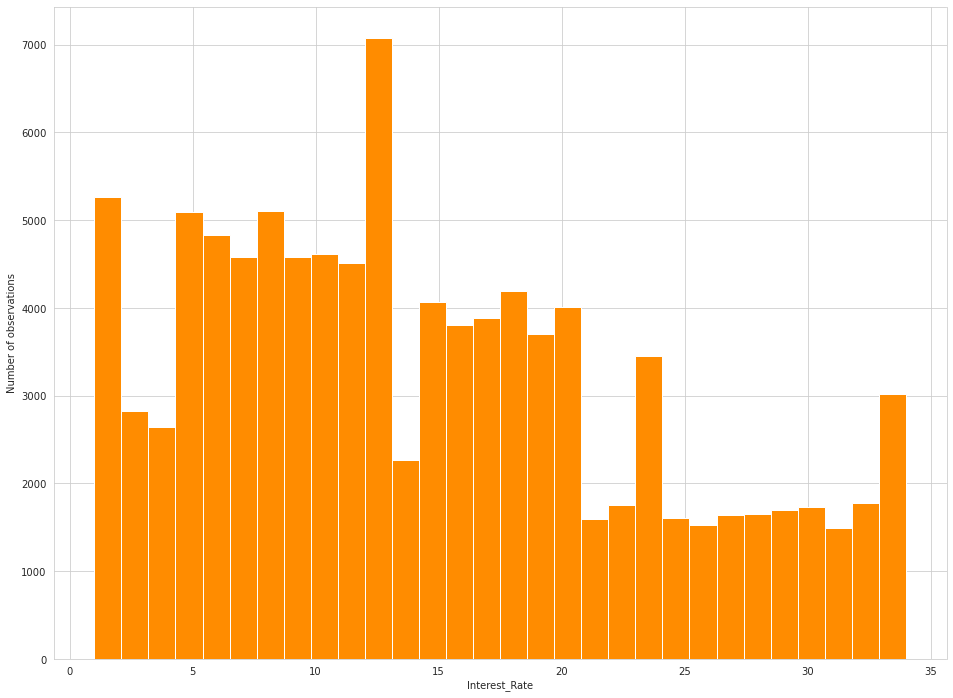

In [242]:
# Removing any outliers
outlierTreat('Interest_Rate')

# Imputing the interest rate for each customer based on their existing rate.
groupImputer_mode('Interest_Rate')

# Countplot
histPlotByCol('Interest_Rate')


### Number of Loan cleaning

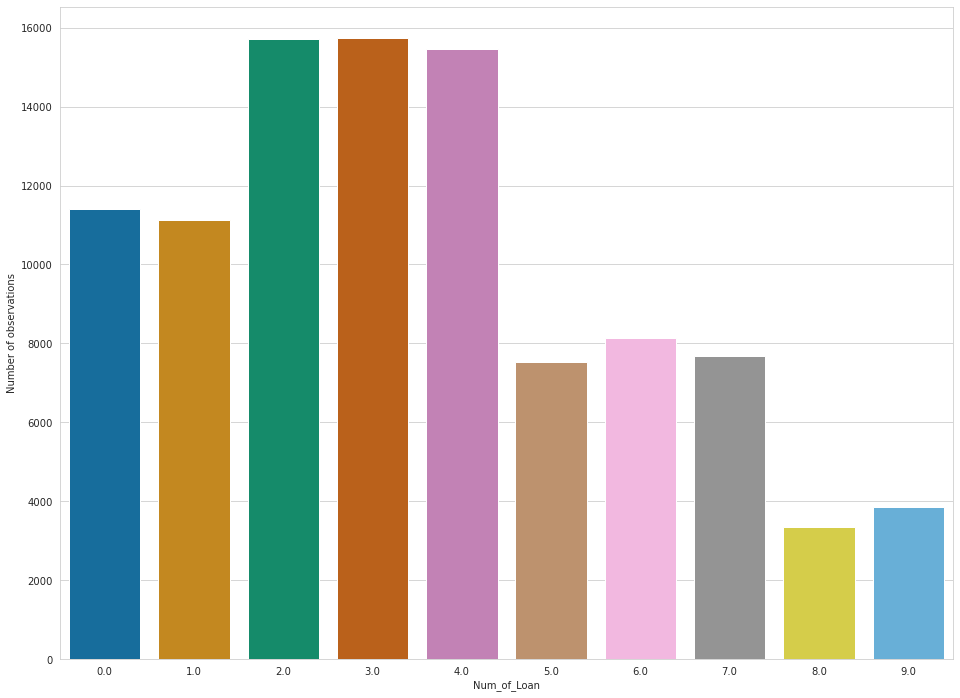

In [243]:
# Convert to float
df_train['Num_of_Loan'] = df_train['Num_of_Loan'].astype('float64')

# Removing outliers
outlierTreat('Num_of_Loan')

# Imputing the inumber of loan for each customer based on their existing ones.
groupImputer_mode('Num_of_Loan')

# Countplot
countPlotByCol('Num_of_Loan')

### Type of Loan cleaning

In [244]:
df_train['Type_of_Loan'] = df_train['Type_of_Loan'].apply(lambda x: x.lower().replace('and ', '').replace(', ', ',').strip() if pd.notna(x) else x)
df_train['Type_of_Loan'].unique()

array(['auto loan,credit-builder loan,personal loan,home equity loan',
       'credit-builder loan', 'auto loan,auto loan,not specified', ...,
       'home equity loan,auto loan,auto loan,auto loan',
       'payday loan,student loan,mortgage loan,not specified',
       'personal loan,auto loan,mortgage loan,student loan,student loan'],
      dtype=object)

In [245]:
df_train_type_loan = pd.DataFrame(df_train['Type_of_Loan'])
simple_imputer = SimpleImputer(strategy = 'most_frequent')
df_train_type_loan = pd.DataFrame(simple_imputer.fit_transform(df_train_type_loan))
df_train['Type_of_Loan'] = df_train_type_loan

### Delay from due date cleaning

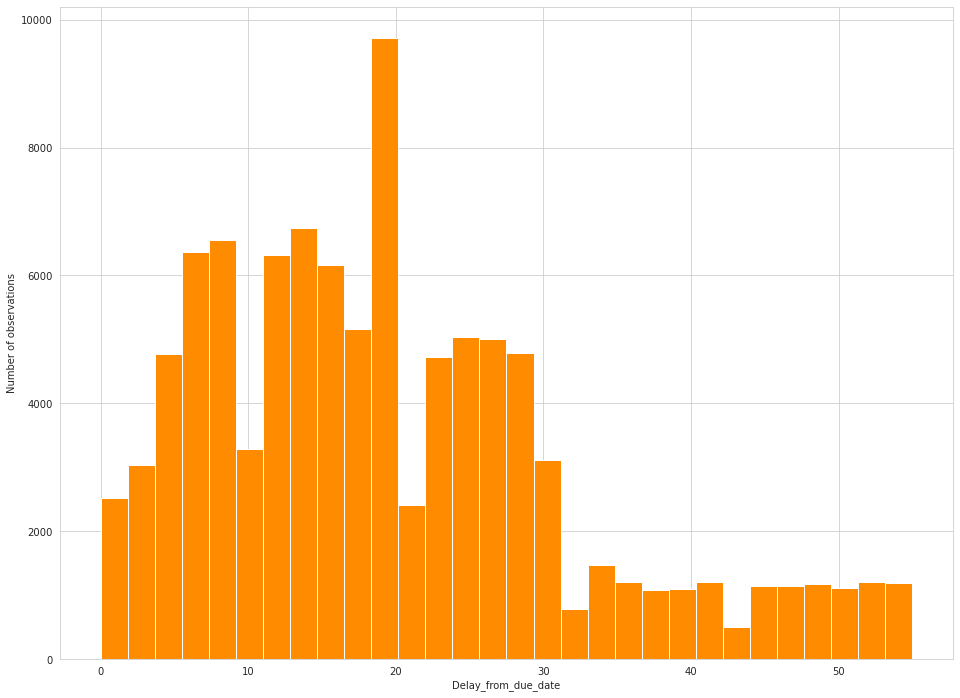

In [246]:
# Remove outliers
outlierTreat('Delay_from_due_date')

df_train_delay = pd.DataFrame(df_train['Delay_from_due_date'])
simple_imputer = SimpleImputer(strategy = 'mean')
df_train_delay = pd.DataFrame(simple_imputer.fit_transform(df_train_delay))
df_train['Delay_from_due_date'] = df_train_delay

histPlotByCol('Delay_from_due_date')

### Number of delayed payment

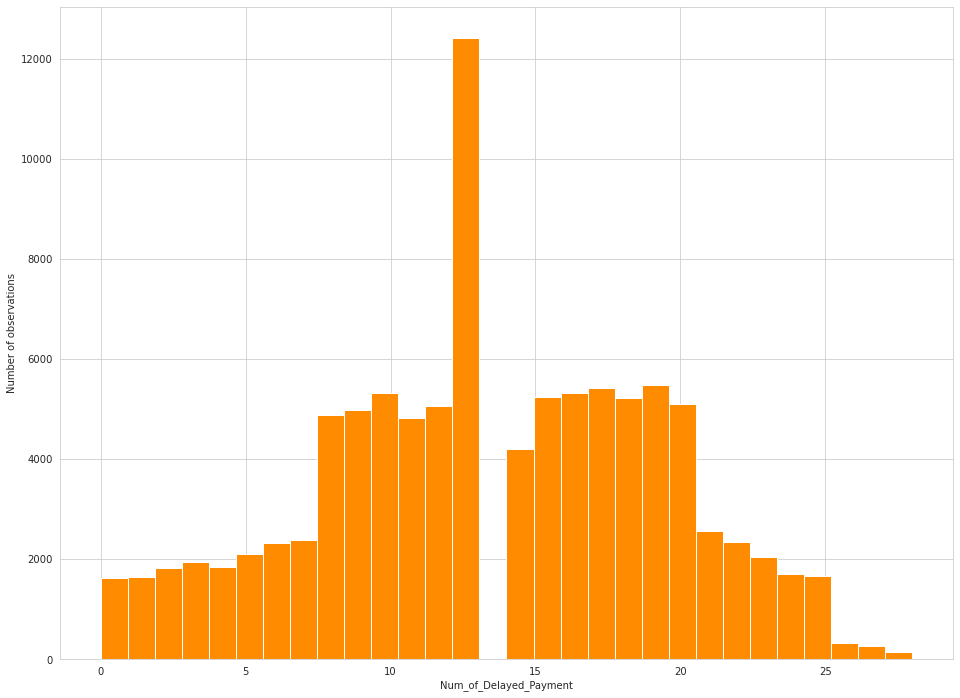

In [247]:
df_train.loc[df_train['Num_of_Delayed_Payment'] == 'NaN', 'Num_of_Delayed_Payment'] = np.NaN
df_train['Num_of_Delayed_Payment'] = df_train['Num_of_Delayed_Payment'].astype('float64')

outlierTreat('Num_of_Delayed_Payment')

df_train_num_delay = pd.DataFrame(df_train['Num_of_Delayed_Payment'])
simple_imputer = SimpleImputer(strategy = 'mean')
df_train_num_delay = pd.DataFrame(simple_imputer.fit_transform(df_train_num_delay))
df_train['Num_of_Delayed_Payment'] = round(df_train_num_delay)

histPlotByCol('Num_of_Delayed_Payment')

### Changed Credit Limit cleaning

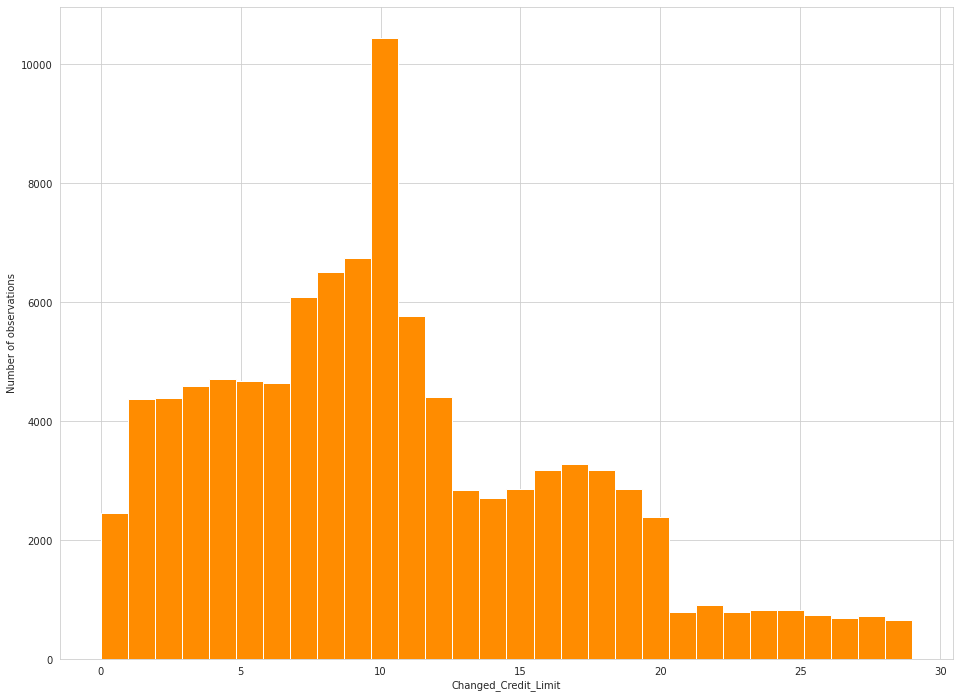

In [248]:
df_train.loc[df_train['Changed_Credit_Limit'] == 'NaN', 'Changed_Credit_Limit'] = np.NaN
df_train['Changed_Credit_Limit'] = df_train['Changed_Credit_Limit'].astype('float64')

outlierTreat('Changed_Credit_Limit')

df_train_credit_change = pd.DataFrame(df_train['Changed_Credit_Limit'])
simple_imputer = SimpleImputer(strategy = 'mean')
df_train_credit_change = pd.DataFrame(simple_imputer.fit_transform(df_train_credit_change))
df_train['Changed_Credit_Limit'] = df_train_credit_change

histPlotByCol('Changed_Credit_Limit')


### Number of Credit Inquiries cleaning

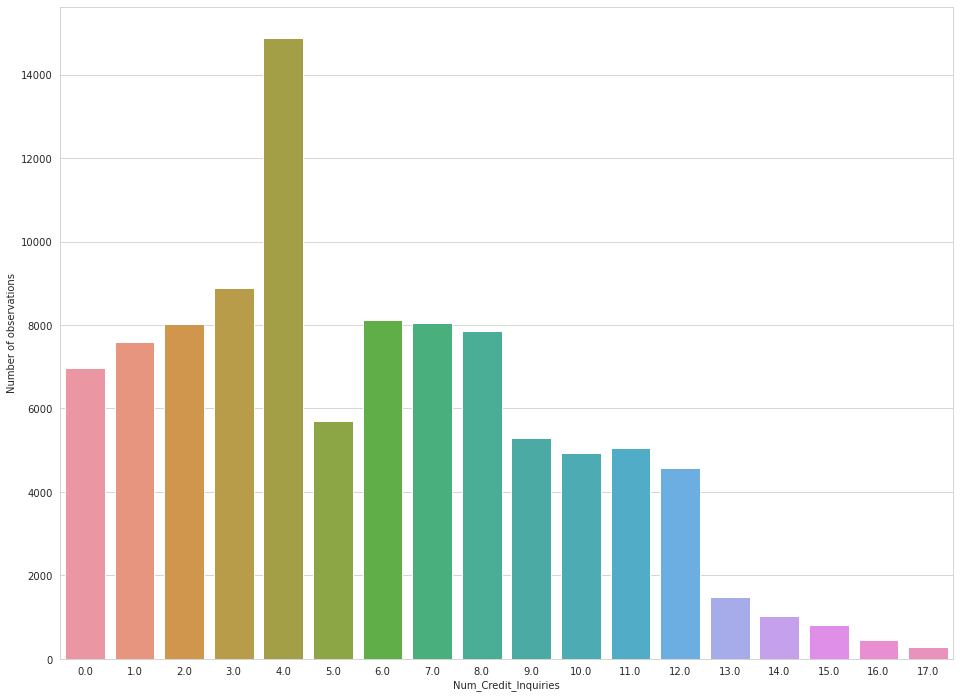

In [249]:
outlierTreat('Num_Credit_Inquiries')

df_train_credit_inq = pd.DataFrame(df_train['Num_Credit_Inquiries'])
simple_imputer = SimpleImputer(strategy = 'most_frequent')
df_train_credit_inq = pd.DataFrame(simple_imputer.fit_transform(df_train_credit_inq))
df_train['Num_Credit_Inquiries'] = df_train_credit_inq

countPlotByCol('Num_Credit_Inquiries')

### Outstanding Debt cleaning

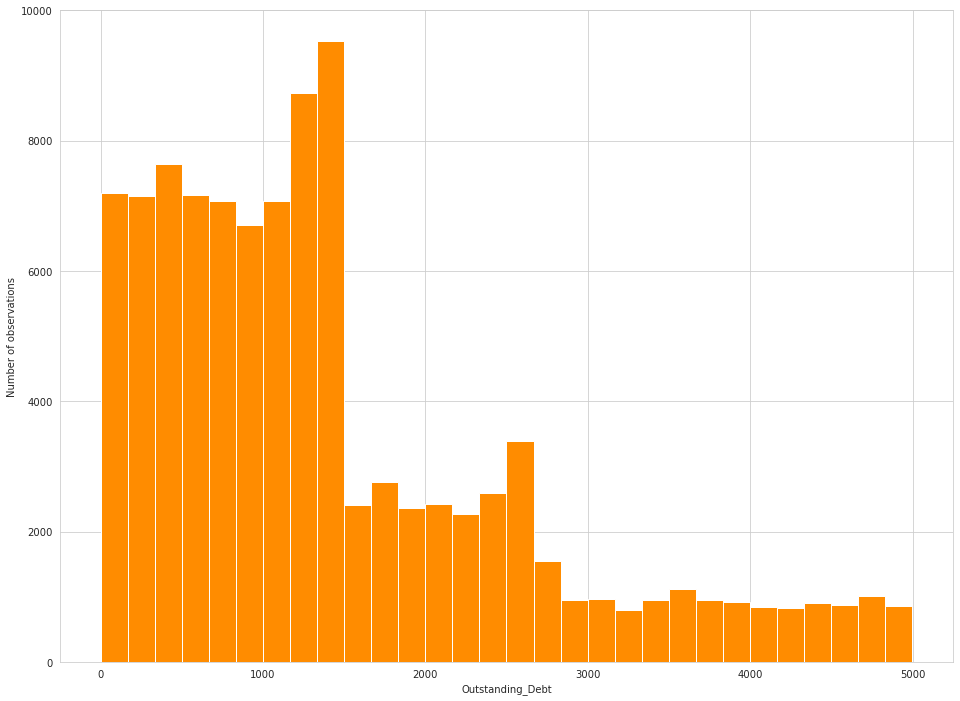

In [250]:
df_train['Outstanding_Debt'] = df_train['Outstanding_Debt'].astype('float64')
histPlotByCol('Outstanding_Debt')

### Total EMI per month - equated monthly installment

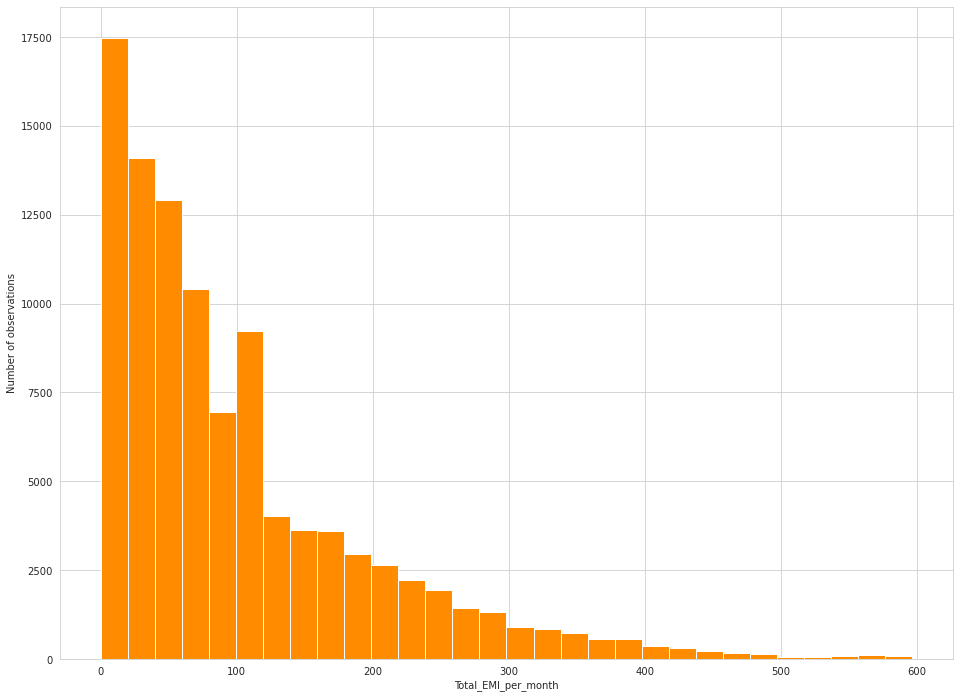

In [251]:
# Removing outliers but this time with a higher upper limit.
df_train.loc[df_train['Total_EMI_per_month'] > 600, 'Total_EMI_per_month'] = np.NaN

#Imputung the mean of the monthly installments
df_train_EMI = pd.DataFrame(df_train['Total_EMI_per_month'])
simple_imputer = SimpleImputer(strategy = 'mean')
df_train_EMI = pd.DataFrame(simple_imputer.fit_transform(df_train_EMI))
df_train['Total_EMI_per_month'] = df_train_EMI

histPlotByCol('Total_EMI_per_month')

### Credit History Age cleaning

The credit history age need to be converted from years and months to months only meanwhile making sure that it's is increasing gradually for each consectutive months.   
For this we use linear interpolation on our data to impute the missing values.

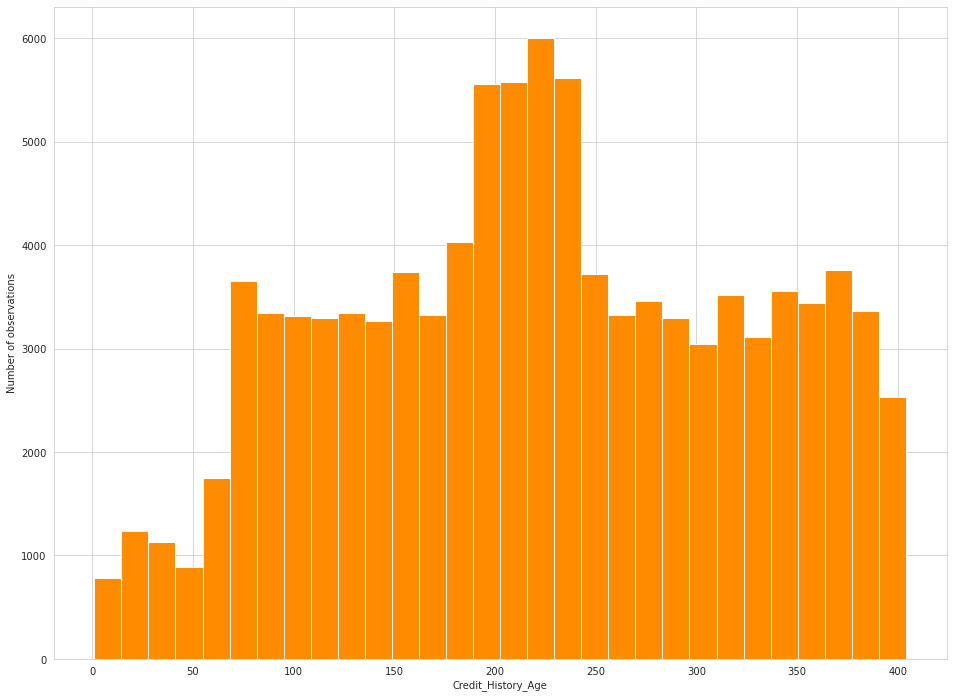

In [252]:
def CreditHistoryConverter(value):
    if value is not np.NaN:
        year = int(value.split(' ')[0])
        month = int(value.split(' ')[3])

        return ((year*12) + month)
    else:
        return value
    
df_train['Credit_History_Age'] = (df_train['Credit_History_Age'].apply(lambda value: CreditHistoryConverter(value)))

def CHAConverter(value):
    for i in value:
        val = pd.DataFrame(value).interpolate(method = 'linear').interpolate(method = 'linear', limit_direction = 'backward')
        return val

grped_df = df_train.groupby('Customer_ID')['Credit_History_Age']
df_dict = {}
for id, group in grped_df:
    new_grp = (CHAConverter(group))
    kv = {id : new_grp}
    df_dict.update(kv)

for key, value in df_dict.items():
    for i in value.iterrows():
        id = i[0]
        val = i[1][0]
        df_train.loc[df_train.index == id, 'Credit_History_Age'] = val

histPlotByCol('Credit_History_Age')

### Amount Invested Monthly cleaning

Imputing for each customer based on their monthly most amount invested monthly.

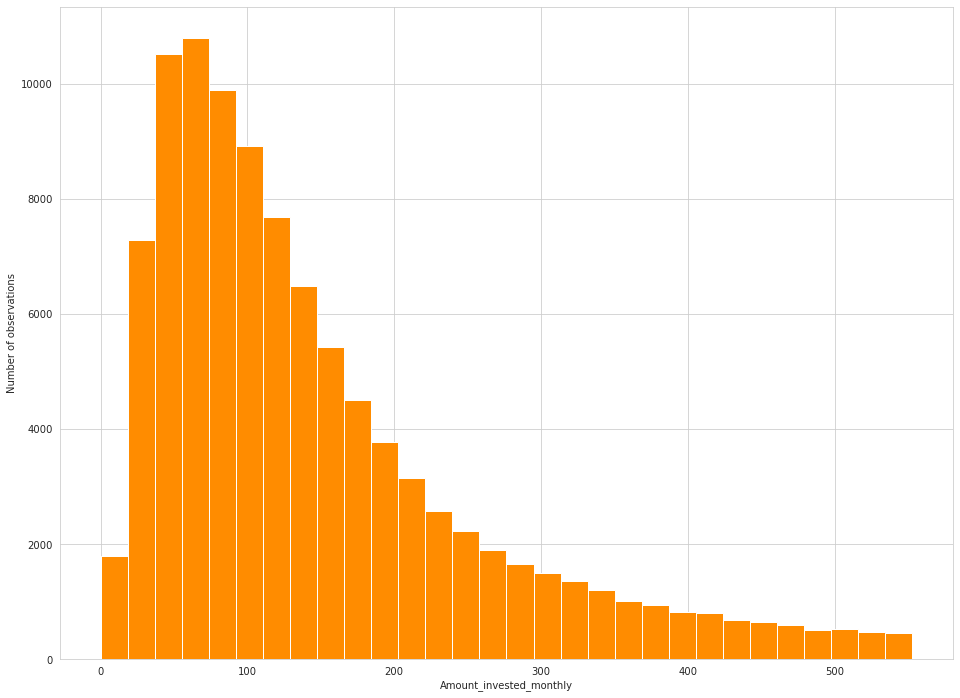

In [253]:
# Converting to numeric and imputing.
df_train['Amount_invested_monthly'] = df_train['Amount_invested_monthly'].astype('float64')
outlierTreat('Amount_invested_monthly')
groupImputer_mode('Amount_invested_monthly')

histPlotByCol('Amount_invested_monthly')

### Payment Behaviour cleaning

We simply imputing the last transaction behaviour for the missing values so that the data to be more consistent.

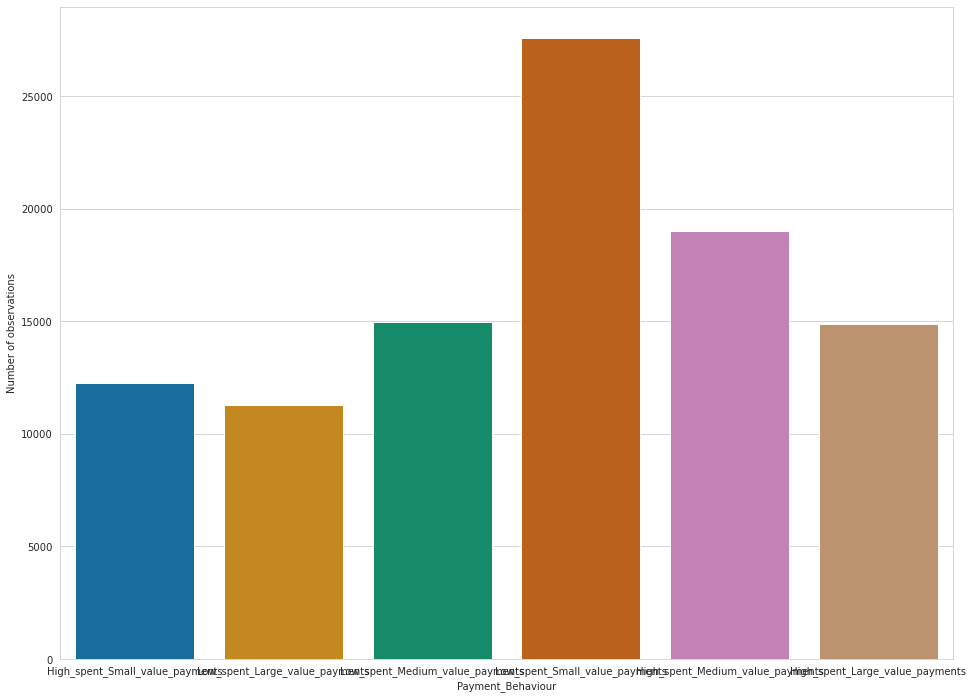

In [254]:
df_train['Payment_Behaviour'].fillna(method = 'ffill', inplace = True)

#Countplot
countPlotByCol('Payment_Behaviour')

### Monthly Balance cleaning

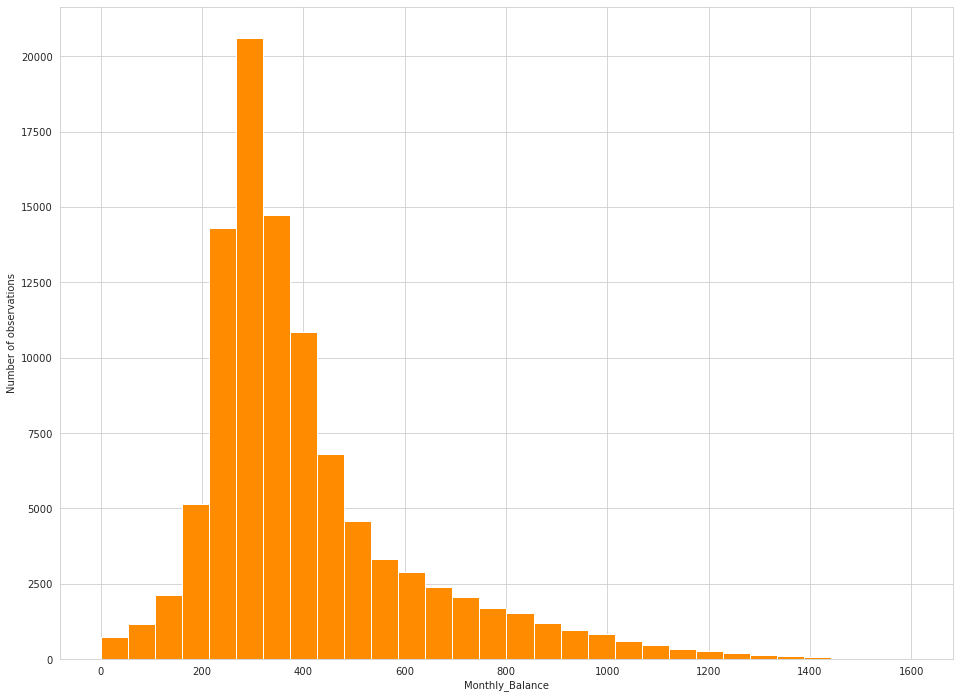

In [255]:
# Convert variabel to numeric and removing negative values.
df_train['Monthly_Balance'] = df_train['Monthly_Balance'].astype('float64')
df_train.loc[df_train['Monthly_Balance'] < 0, 'Monthly_Balance'] = np.NaN

# Imputing for the missing values.
df_train_monthly_bal = pd.DataFrame(df_train['Monthly_Balance'])
knn_imputer = KNNImputer(n_neighbors = 2)
df_train_monthly_bal = pd.DataFrame(knn_imputer.fit_transform(df_train_monthly_bal))
df_train['Monthly_Balance'] = df_train_monthly_bal

histPlotByCol('Monthly_Balance')

<AxesSubplot:>

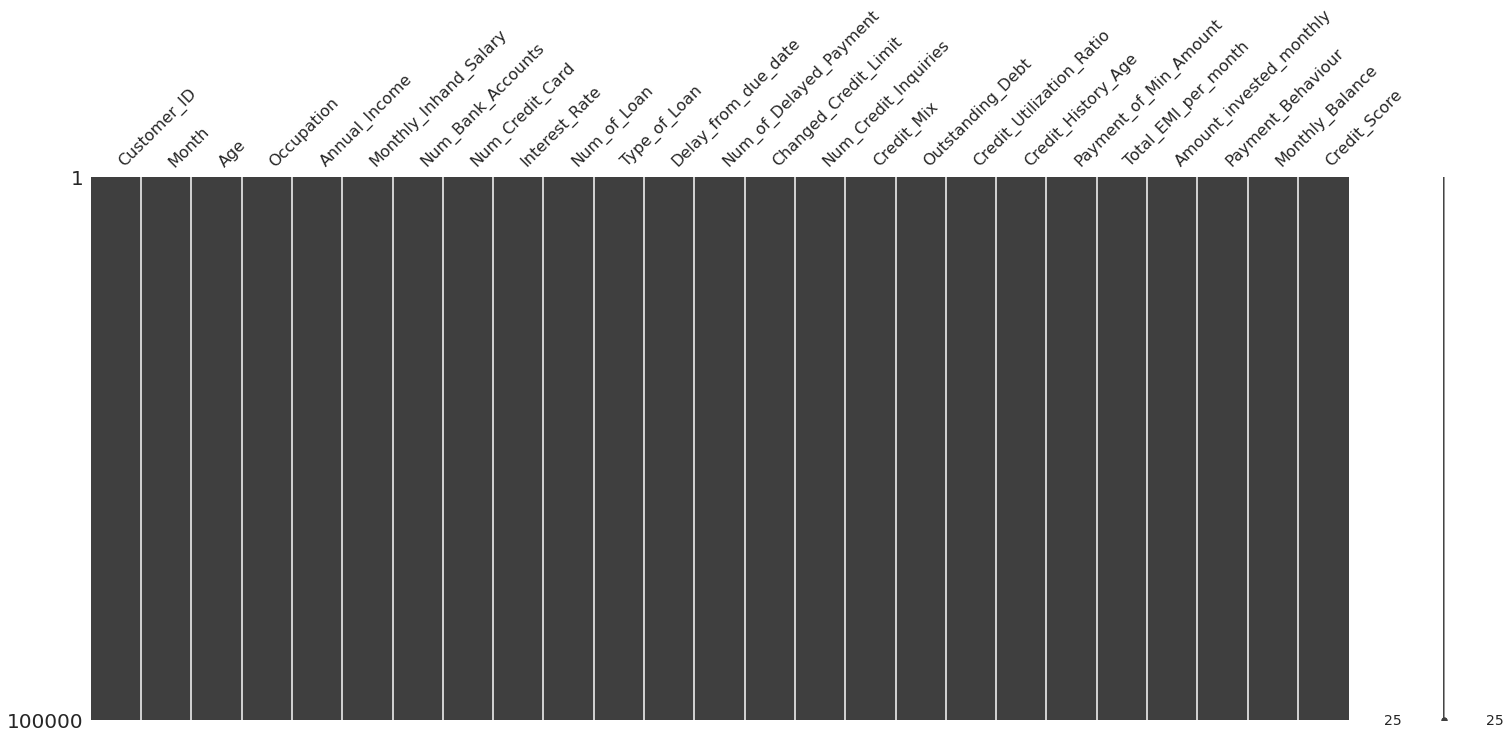

In [256]:
msno.matrix(df_train)

There are no missing values, all the variables have been converted.  
Let's have a look on the distribution of these numeric columns.

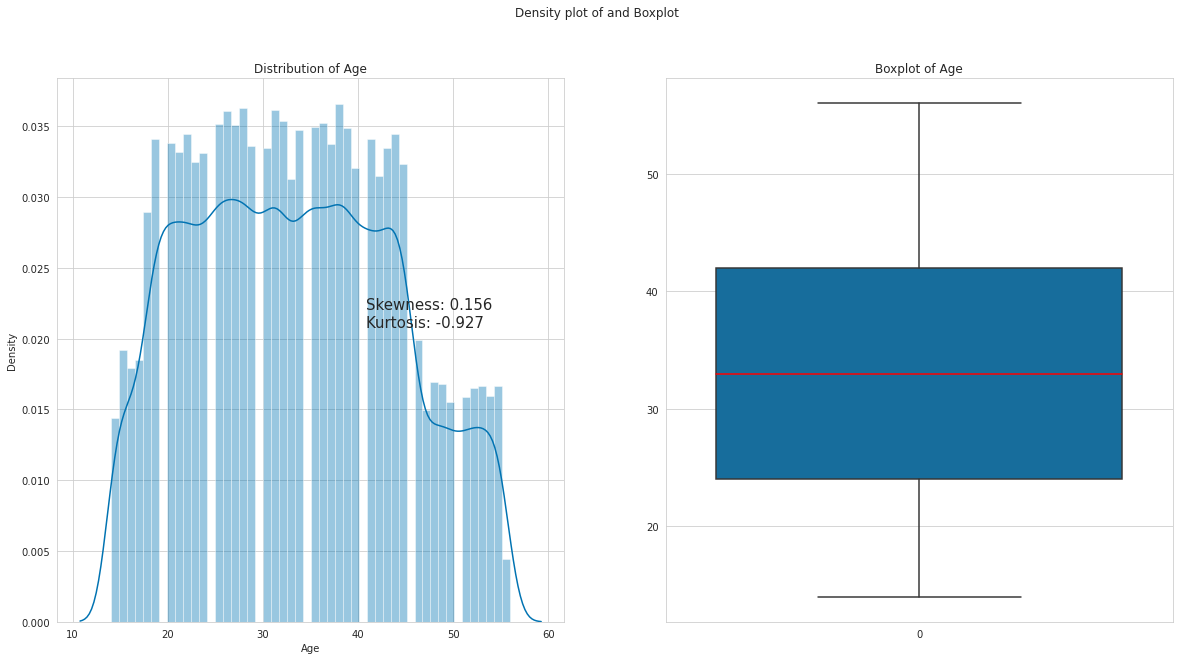

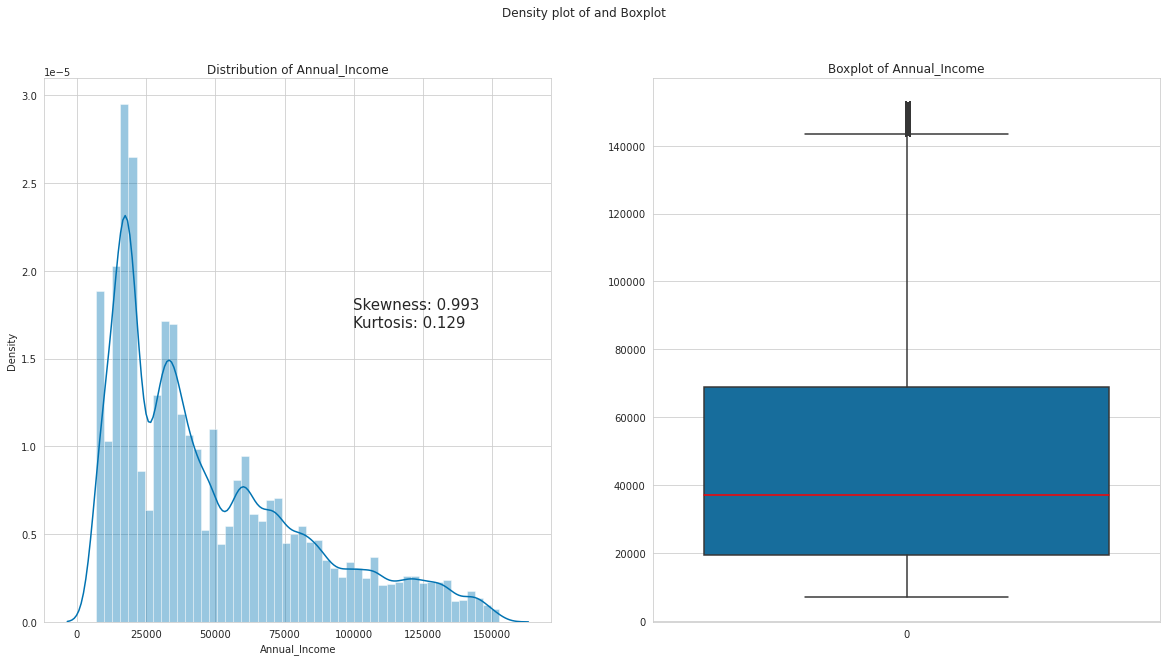

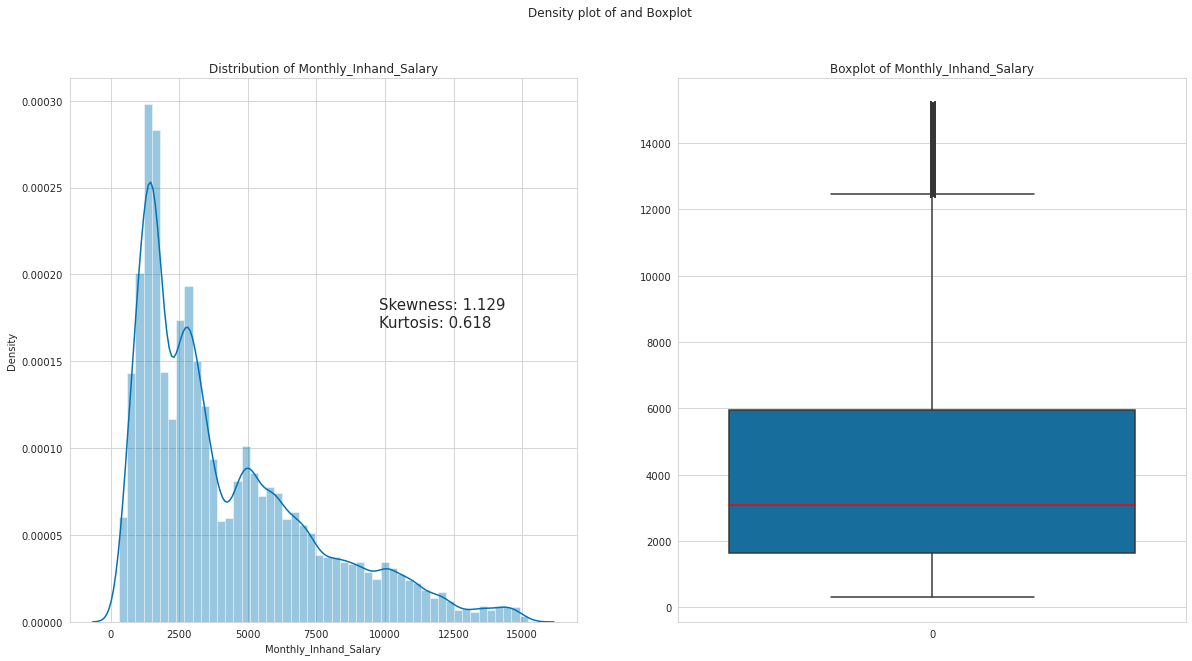

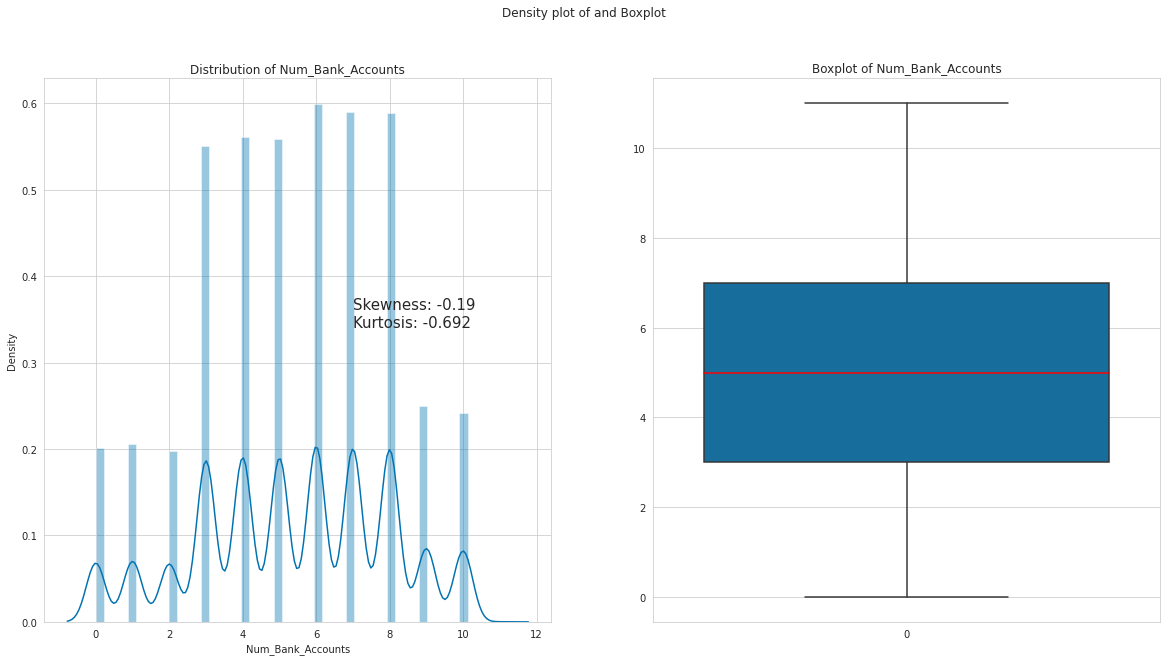

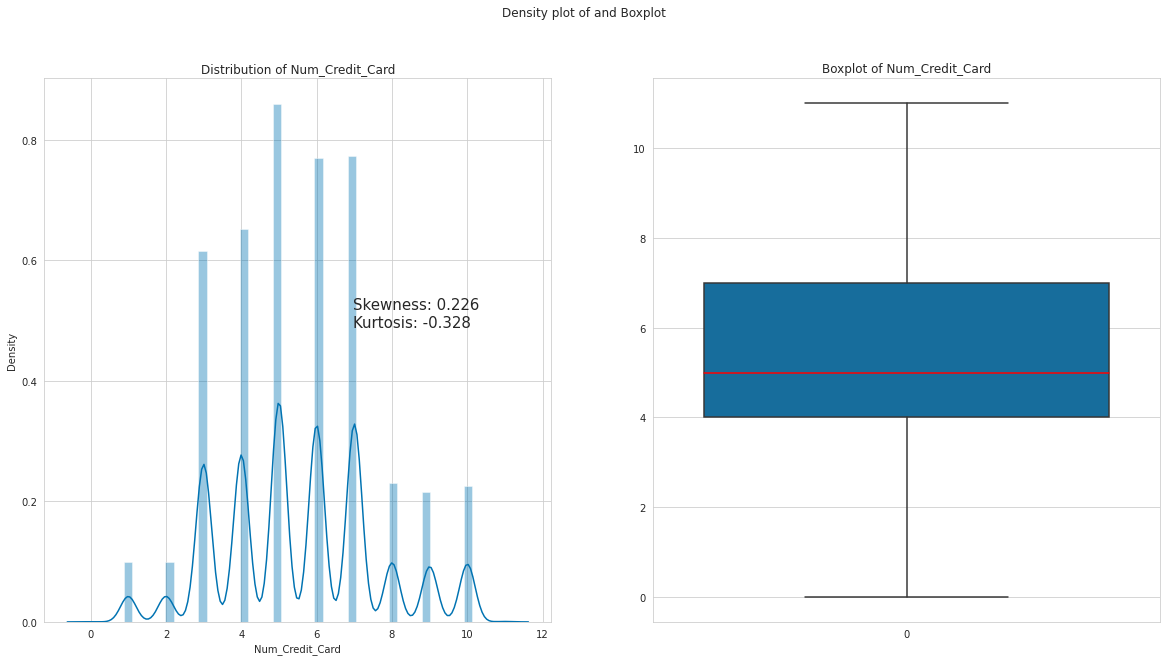

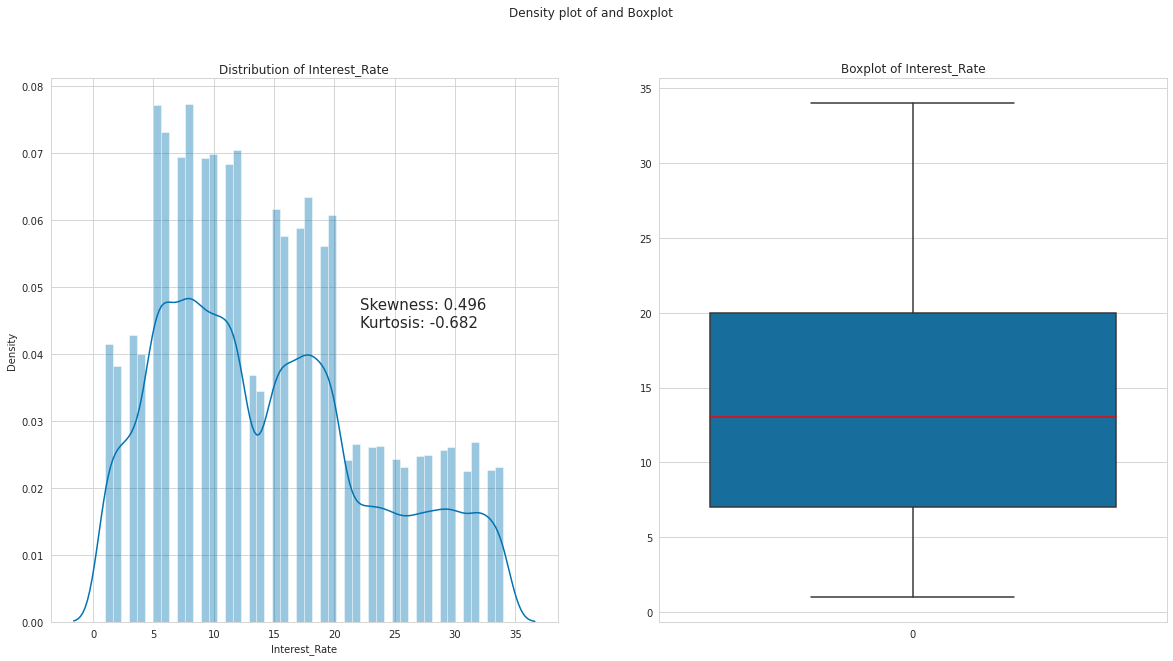

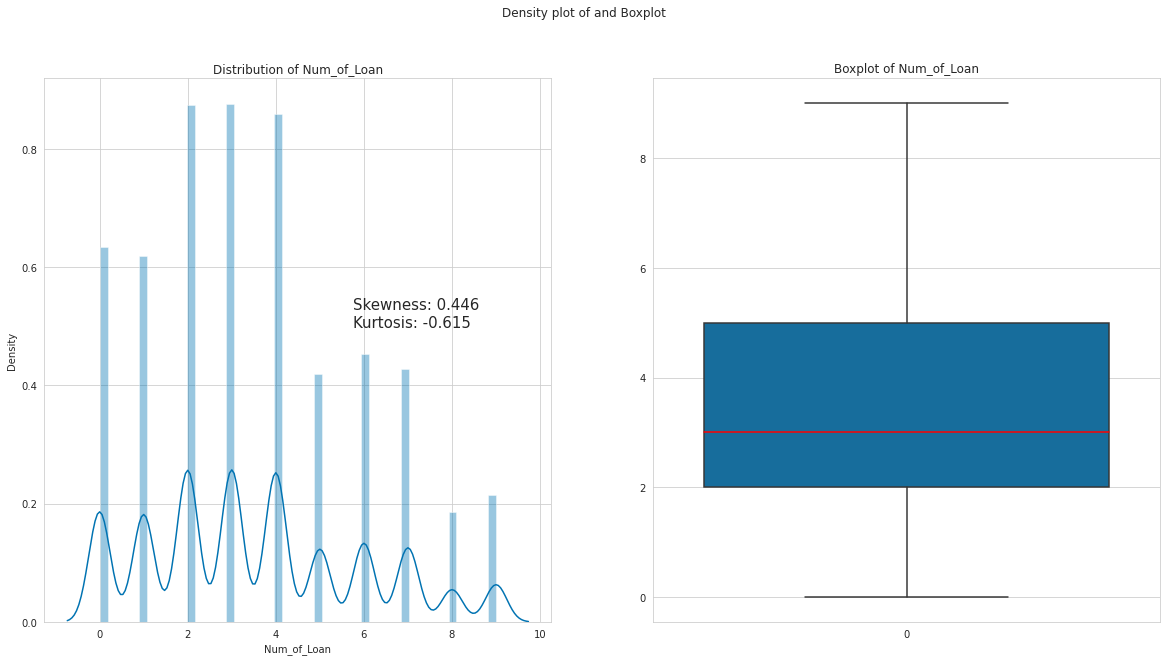

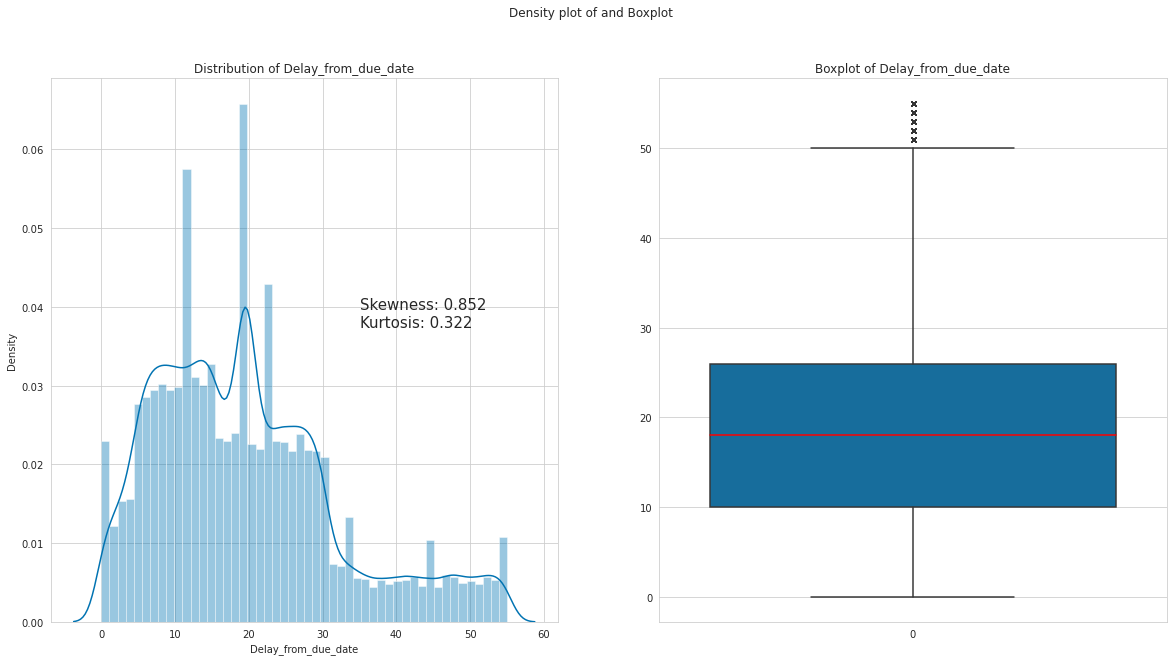

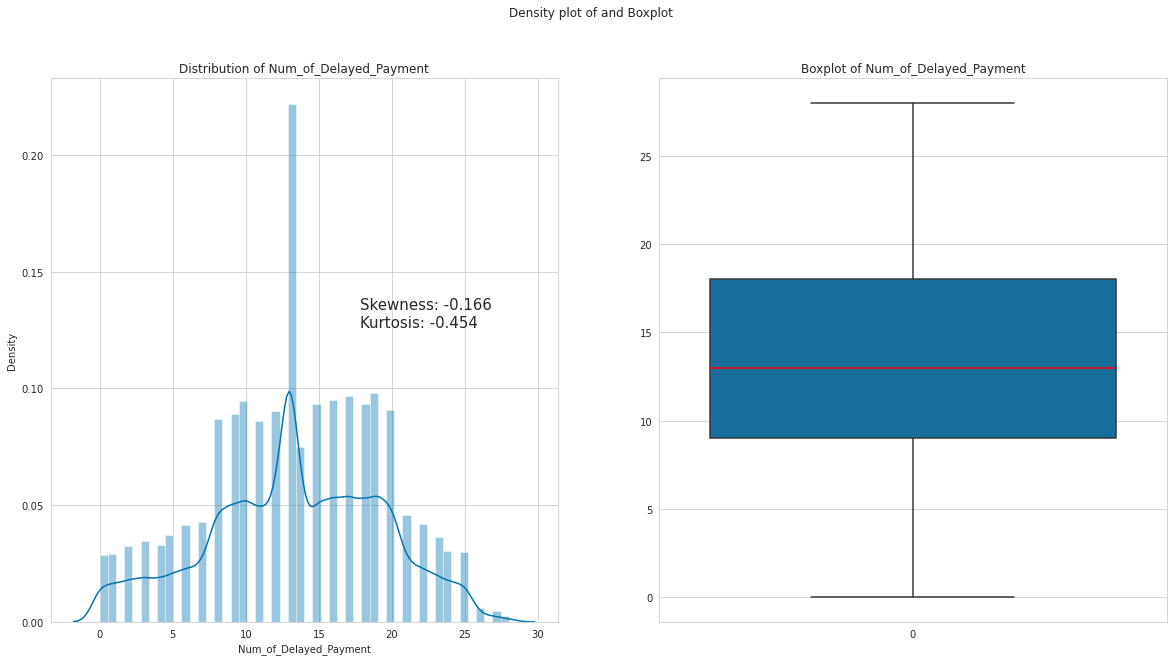

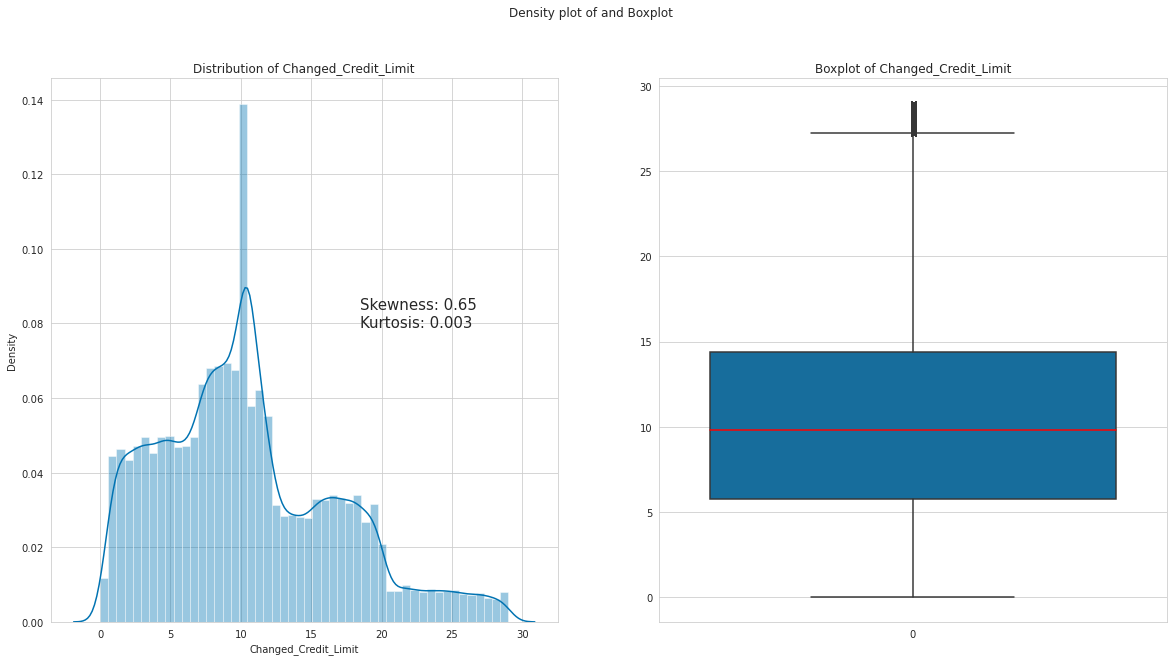

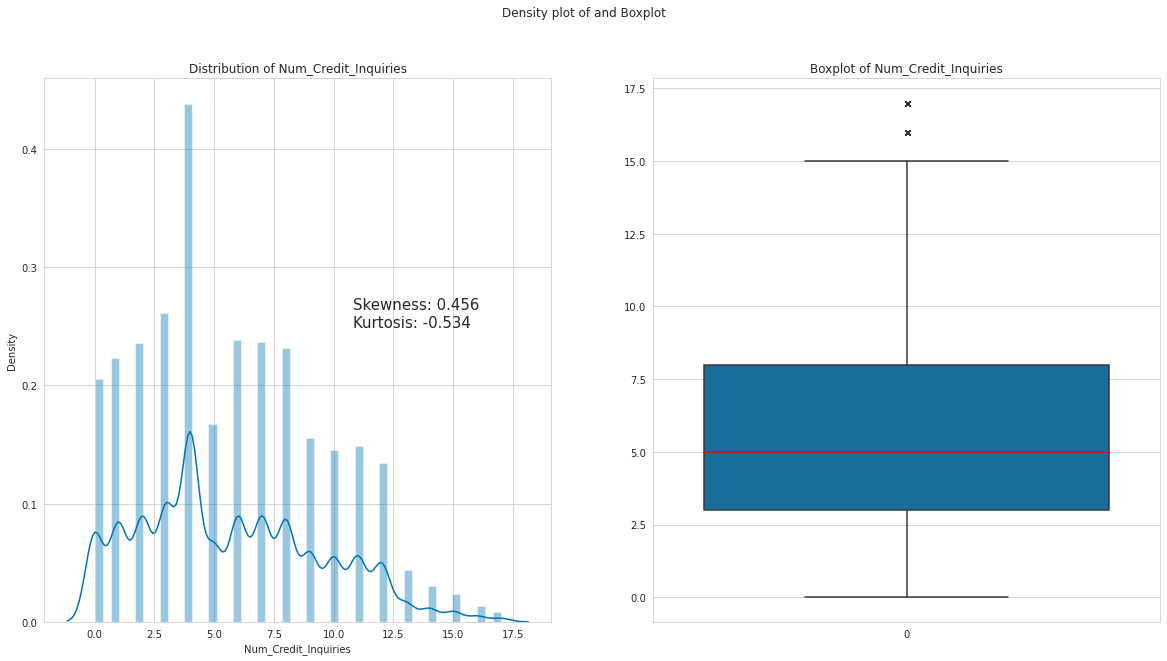

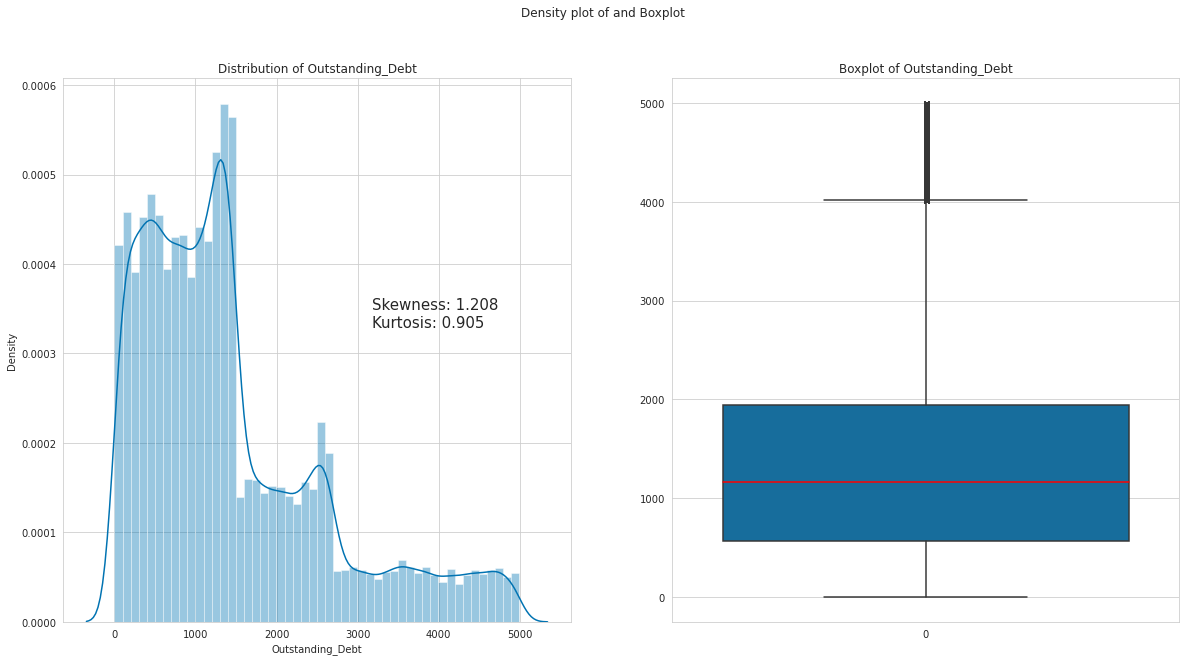

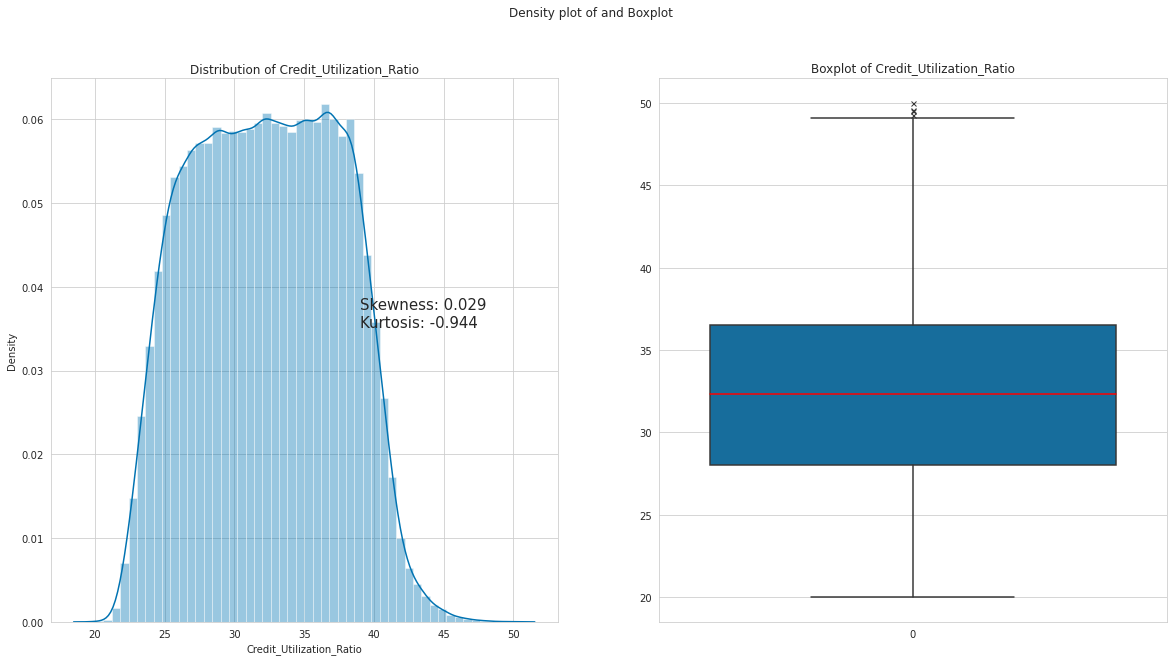

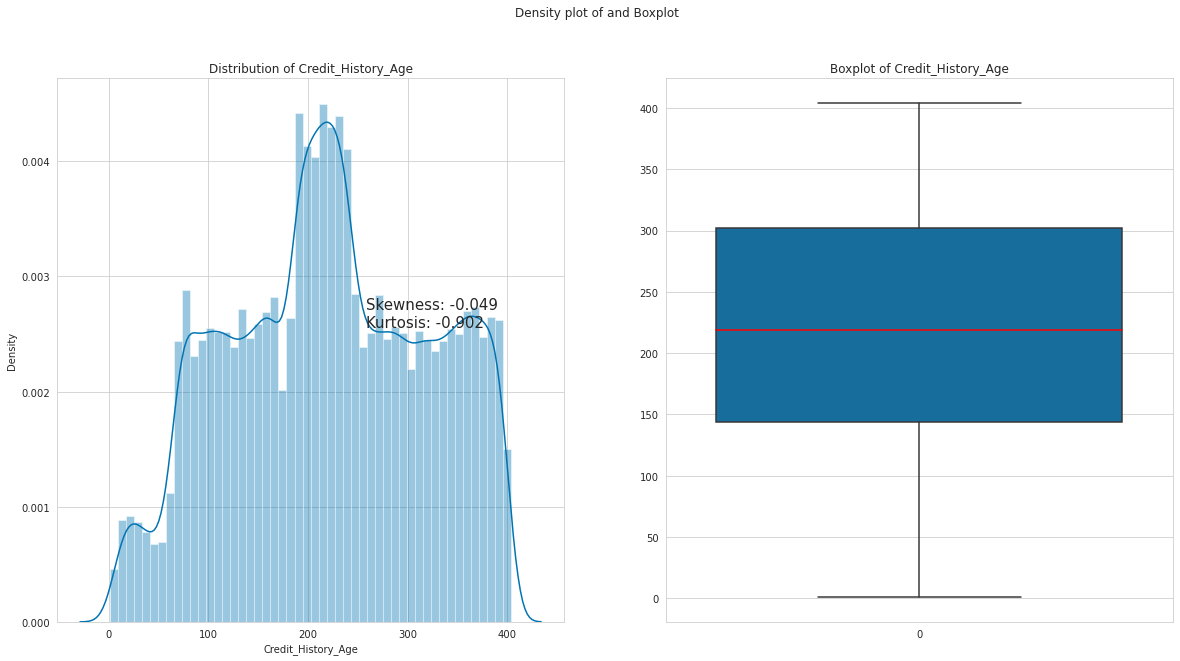

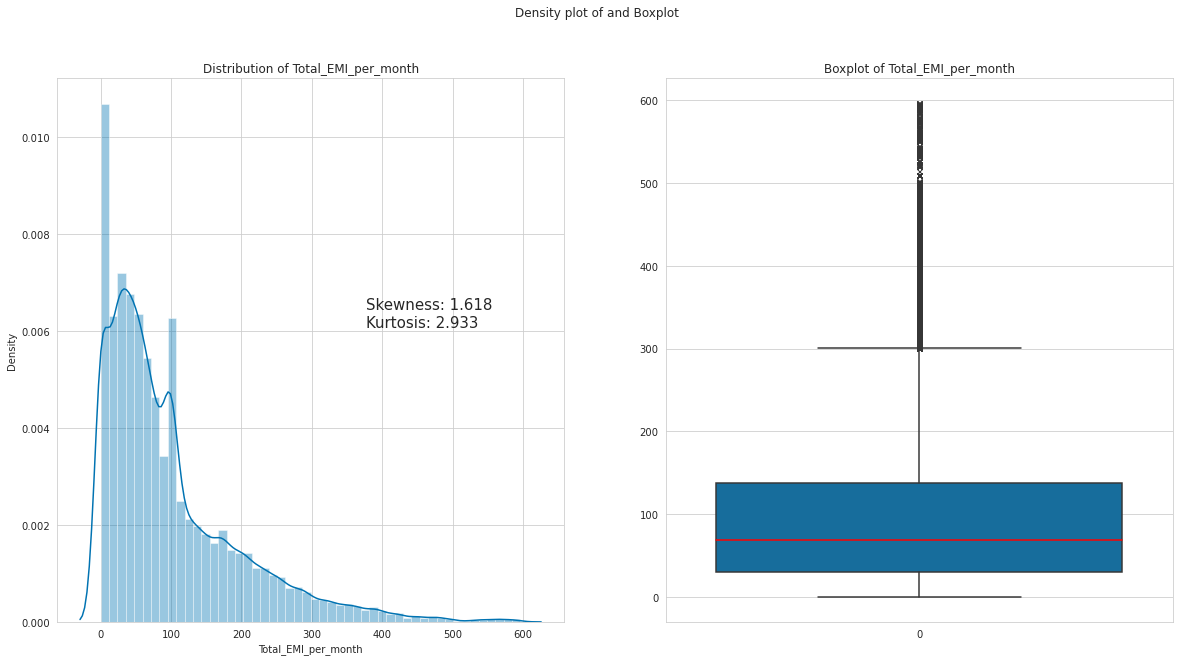

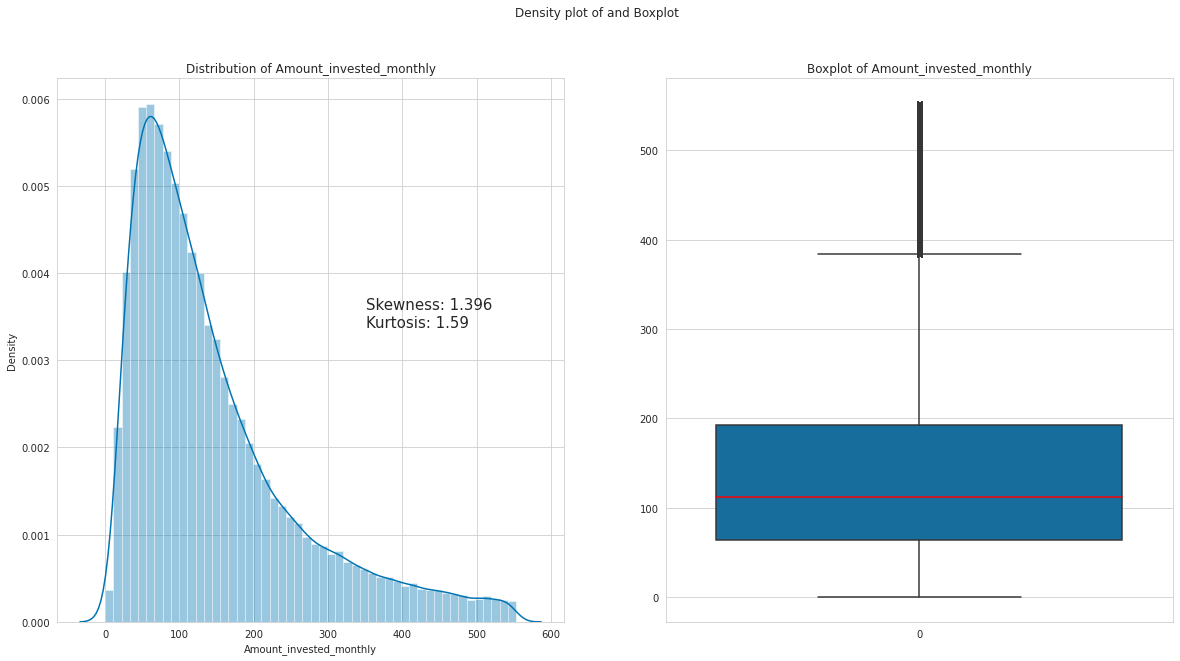

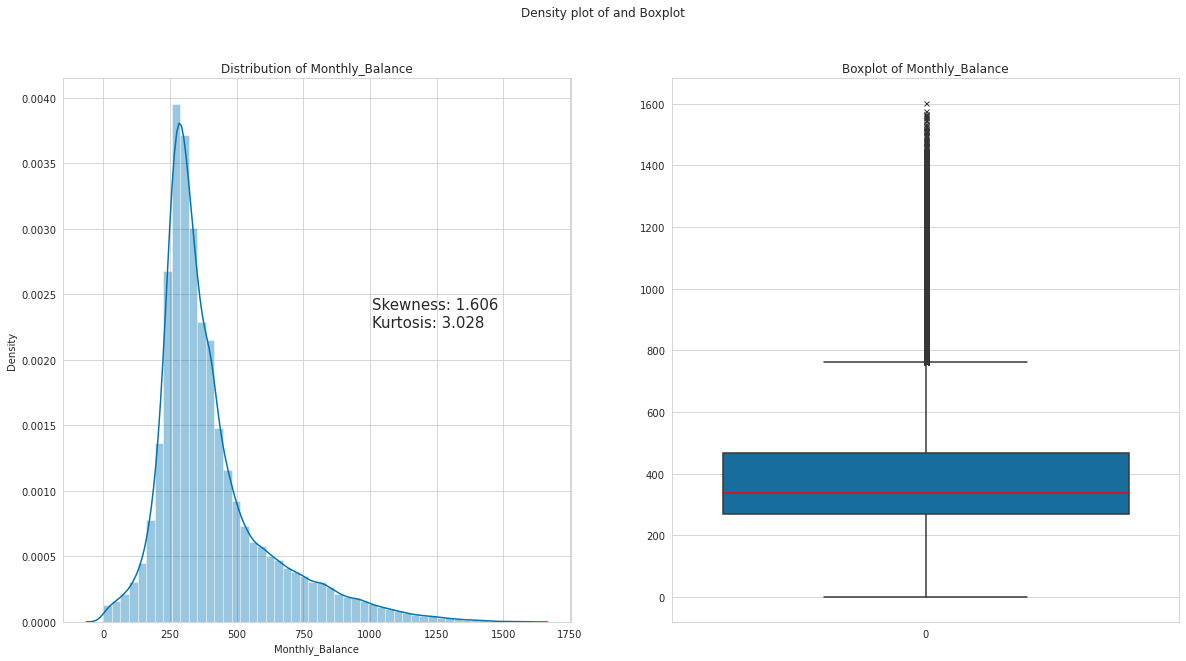

In [257]:
for col in df_train.select_dtypes(include='number').columns:
      plt.figure(figsize=(20,10))
      plt.subplot(121)
      sns.distplot(df_train[col])
      plt.title('Distribution of ' + col)
      plt.subplot(122)
      sns.boxplot(df_train[col],
                  medianprops={"color": "red"},
                  flierprops={"marker": "x"})
      plt.title('Boxplot of ' + col)
      plt.suptitle('Density plot of and Boxplot')
      text = '''
            Skewness: {0}
            Kurtosis: {1}
             '''.format(round(df_train[col].skew(), 3), round(df_train[col].kurtosis(),3))
      plt.figtext(0.3, 0.6, text, horizontalalignment='left', verticalalignment='top', fontsize = 15)
      plt.show()

Most of the data is substantially or moderately skewed hence we need to transform them.

## Data Preprocessing

In [258]:
df_train.var()

Age                         1.158805e+02
Annual_Income               1.213985e+09
Monthly_Inhand_Salary       1.015953e+07
Num_Bank_Accounts           6.725064e+00
Num_Credit_Card             4.273008e+00
Interest_Rate               7.641085e+01
Num_of_Loan                 5.984659e+00
Delay_from_due_date         1.568514e+02
Num_of_Delayed_Payment      3.531504e+01
Changed_Credit_Limit        3.931518e+01
Num_Credit_Inquiries        1.447681e+01
Outstanding_Debt            1.334323e+06
Credit_Utilization_Ratio    2.618241e+01
Credit_History_Age          9.936049e+03
Total_EMI_per_month         9.574381e+03
Amount_invested_monthly     1.275086e+04
Monthly_Balance             4.521083e+04
dtype: float64

Due to the high variance on the Annual Income and the Monthly Salary we need to transform these columns. We use log transformation for high variance.

In [259]:
# Feature to transform
log_trans_col = ['Annual_Income', 'Monthly_Inhand_Salary']

# Defining log transformer
log_transformer = FunctionTransformer(np.log1p)

for col in log_trans_col:
    df_train[col] = log_transformer.fit_transform(df_train[col])

For the rest of the data we use Power Transformation to make the date more like Gaussian-like.

In [260]:
# Features to transform
pt_trans_col = ['Outstanding_Debt', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance',
                'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Changed_Credit_Limit', 'Num_Credit_Inquiries']

# Defining Power Transformer
pt_transformer = PowerTransformer(method = 'yeo-johnson', standardize = True)

for col in pt_trans_col:
    df_train[col] = pt_transformer.fit_transform(df_train[col].values.reshape(-1,1))

### Ordinal encoding

In [261]:
ord_enc_cols = ['Payment_Behaviour', 'Credit_Mix', 'Credit_Score', 'Payment_of_Min_Amount', 'Occupation']
ord_encoder = OrdinalEncoder()
for col in ord_enc_cols:
    df_train[col] = ord_encoder.fit_transform(df_train[col].values.reshape(-1,1))

### One Hot encoding

In [262]:
'''dummy_cols = ['Occupation'] # 'Credit_Mix', 'Payment_of_Min_Amount'

for col in dummy_cols:
    encoded = pd.get_dummies(df_train[col], prefix=col)
    df_train = pd.concat((df_train, encoded), axis=1).drop(col, axis=1)'''


"dummy_cols = ['Occupation'] # 'Credit_Mix', 'Payment_of_Min_Amount'\n\nfor col in dummy_cols:\n    encoded = pd.get_dummies(df_train[col], prefix=col)\n    df_train = pd.concat((df_train, encoded), axis=1).drop(col, axis=1)"

In [263]:
freq_map = df_train['Type_of_Loan'].value_counts(normalize=True).to_dict()
df_train['Type_of_Loan'] = df_train['Type_of_Loan'].map(freq_map)

<AxesSubplot:xlabel='Credit_Score', ylabel='count'>

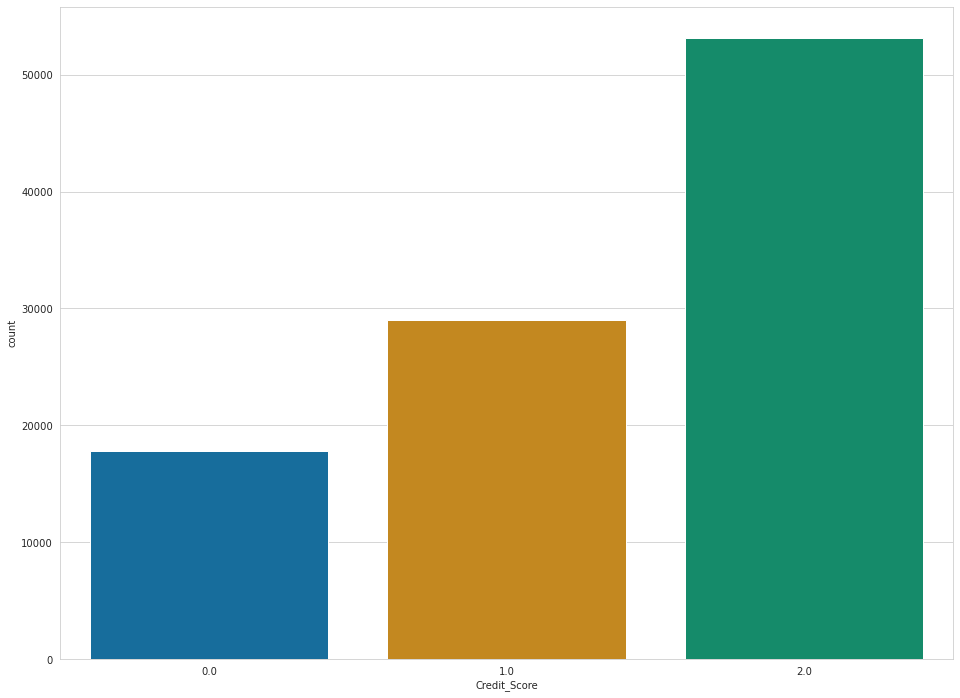

In [264]:
sns.countplot(data = df_train, x = 'Credit_Score')

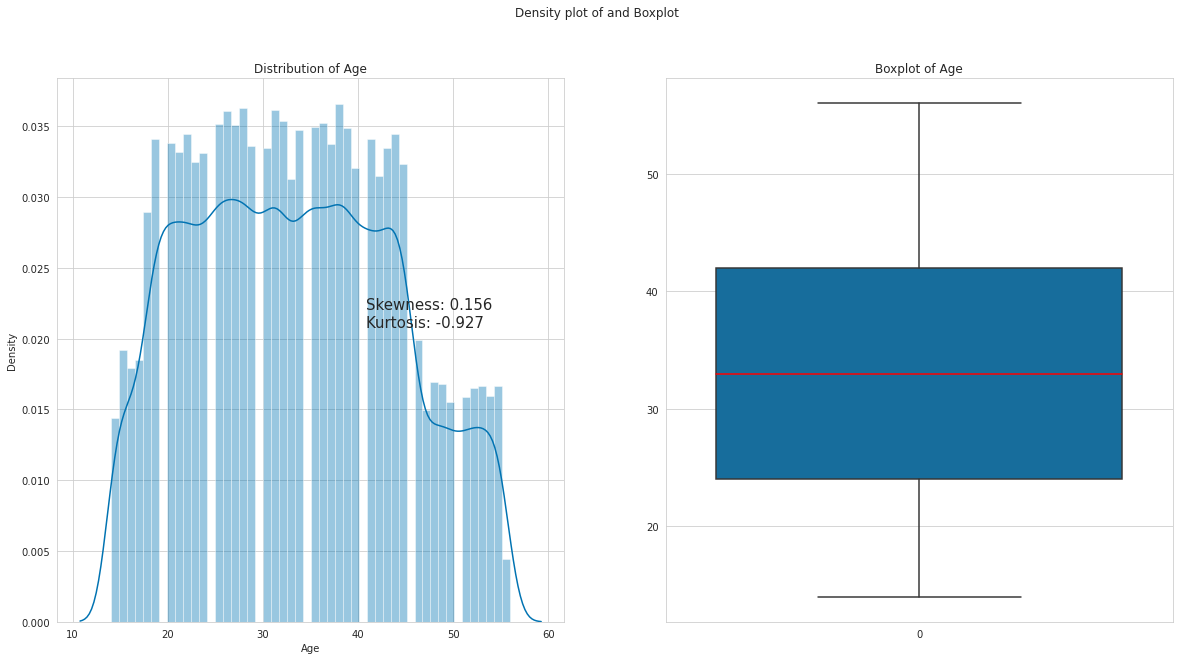

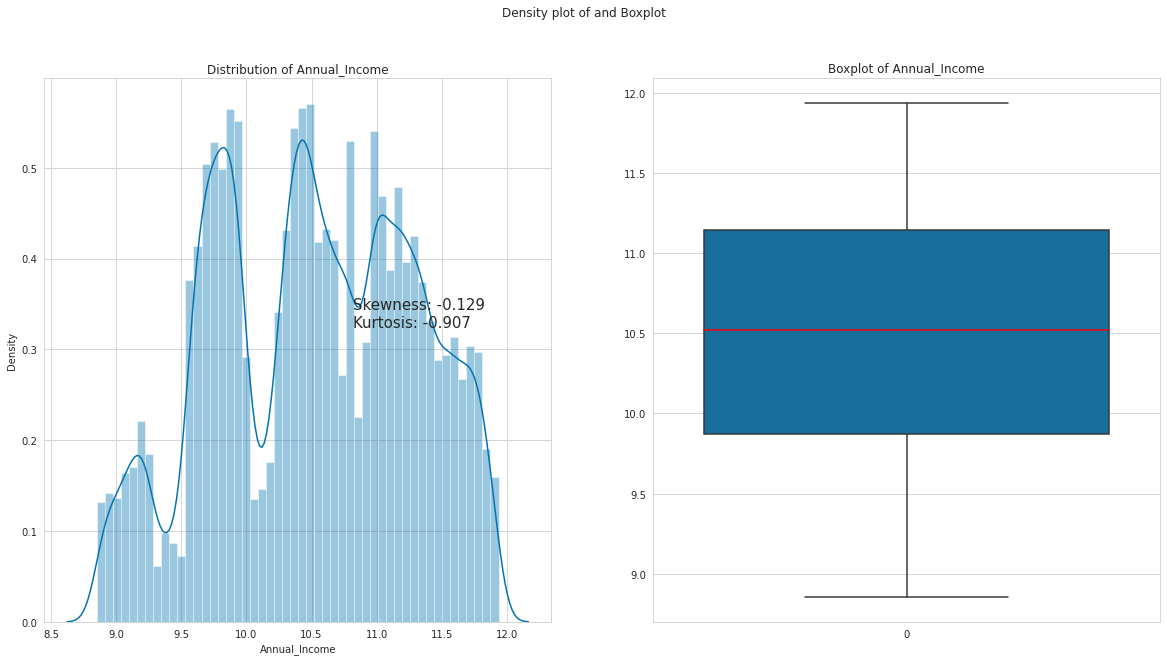

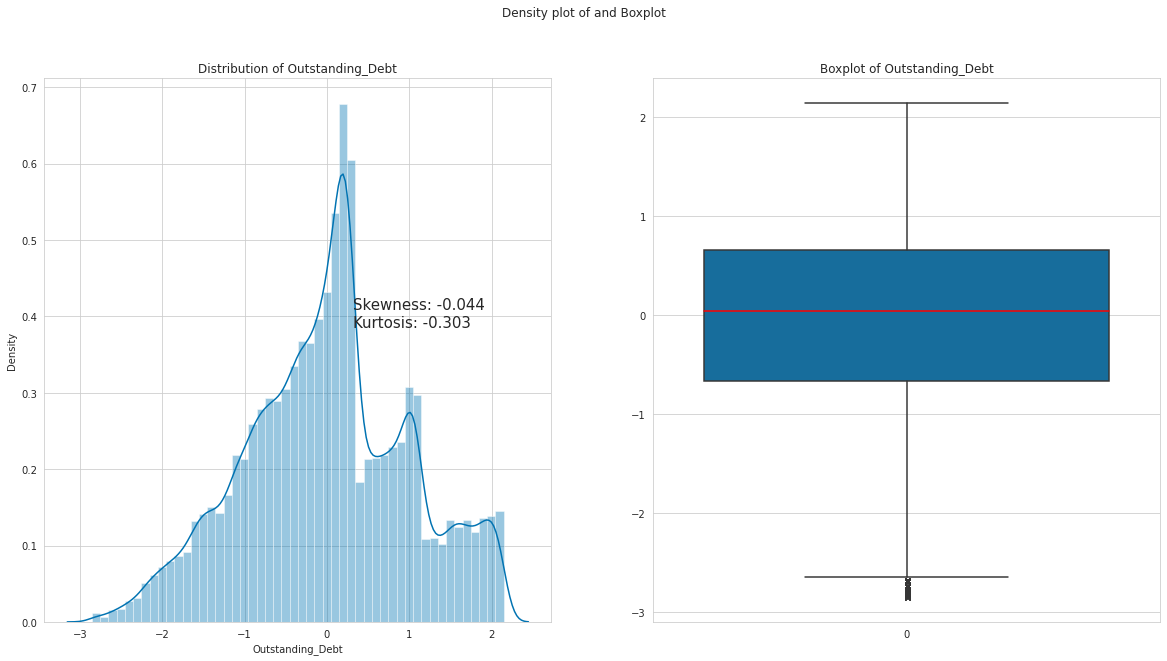

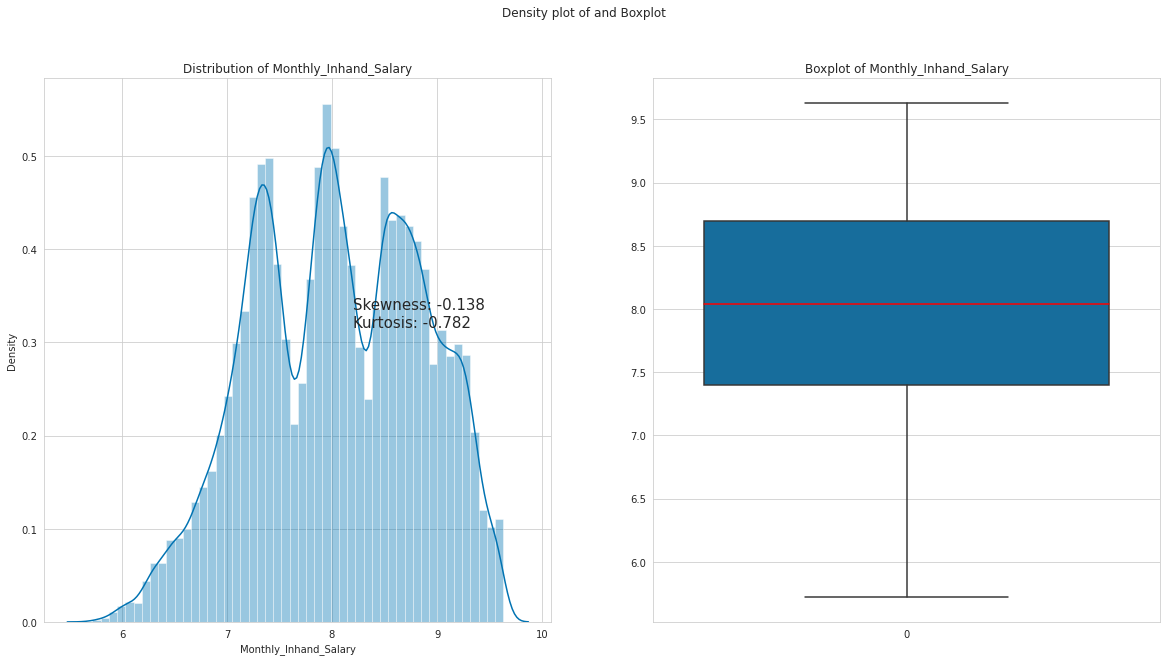

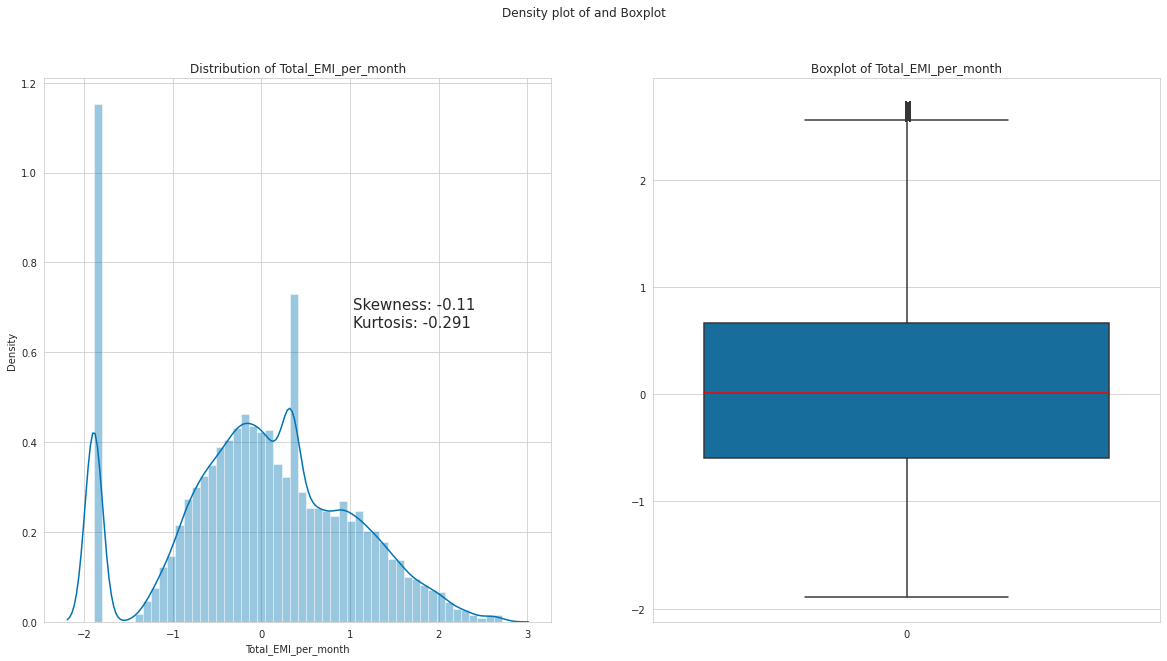

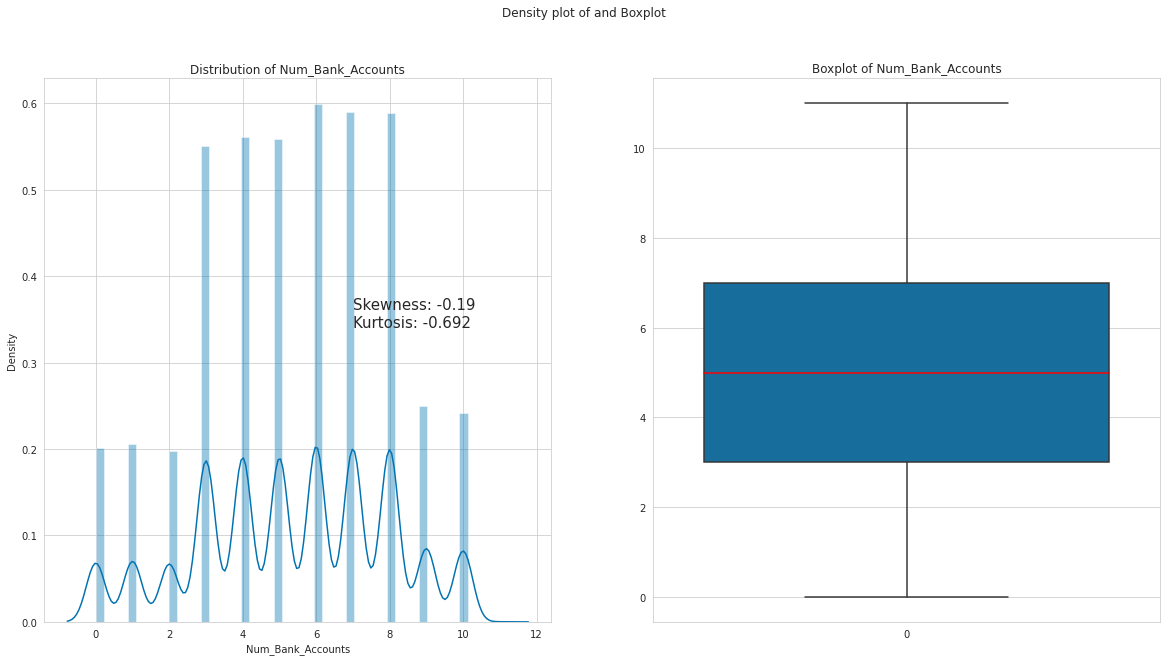

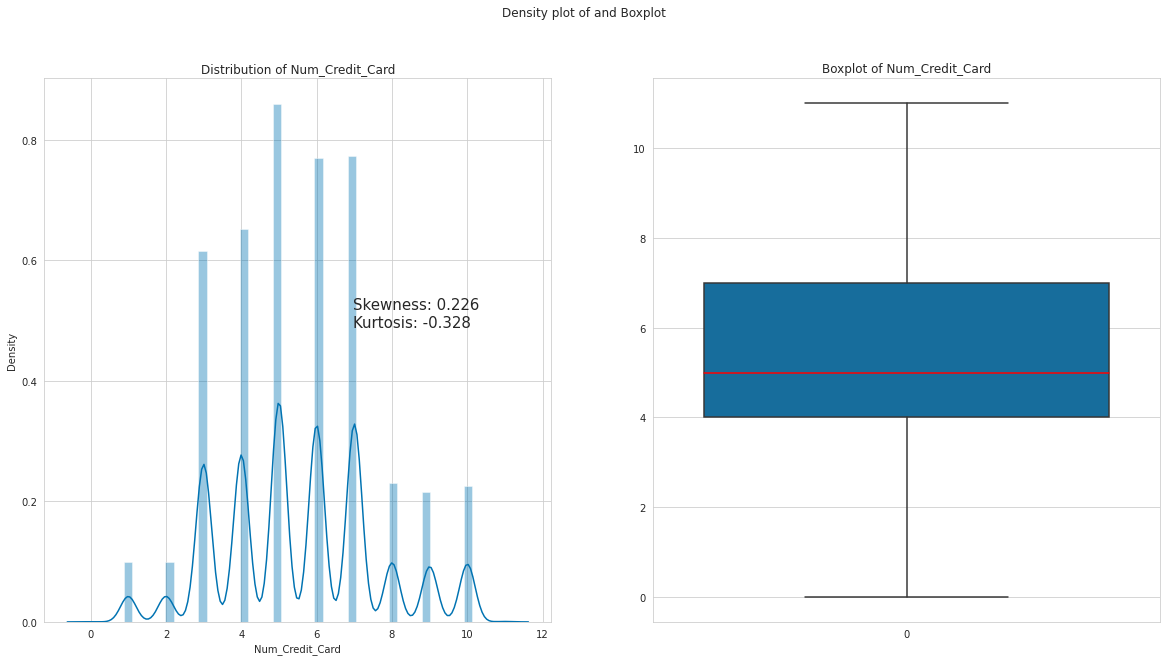

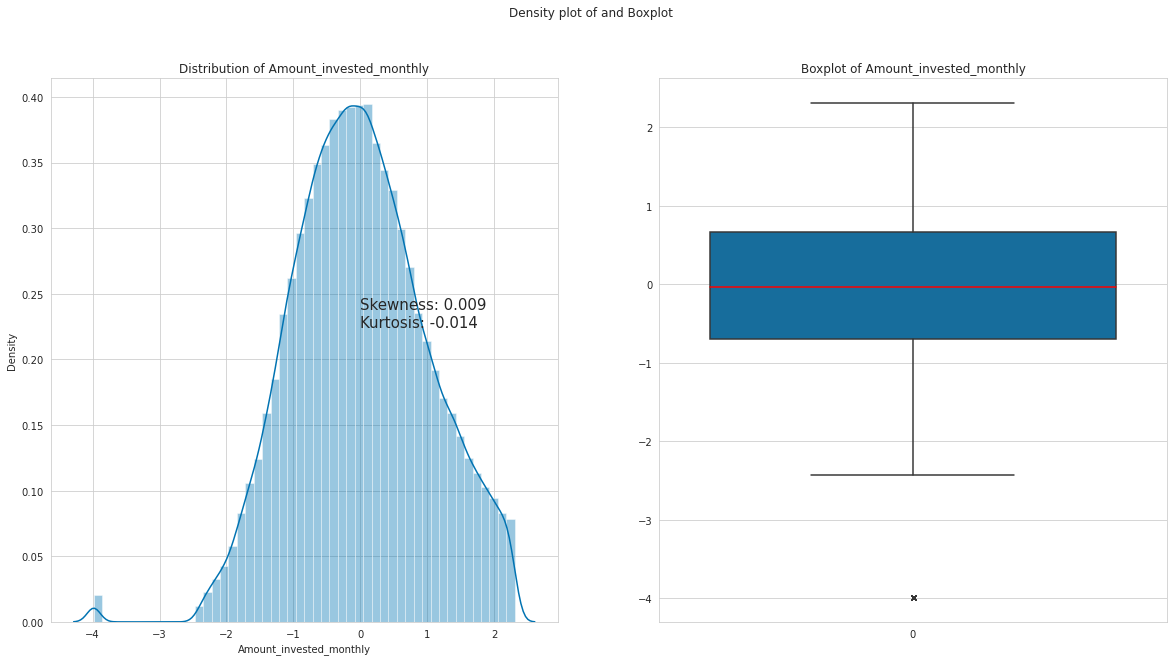

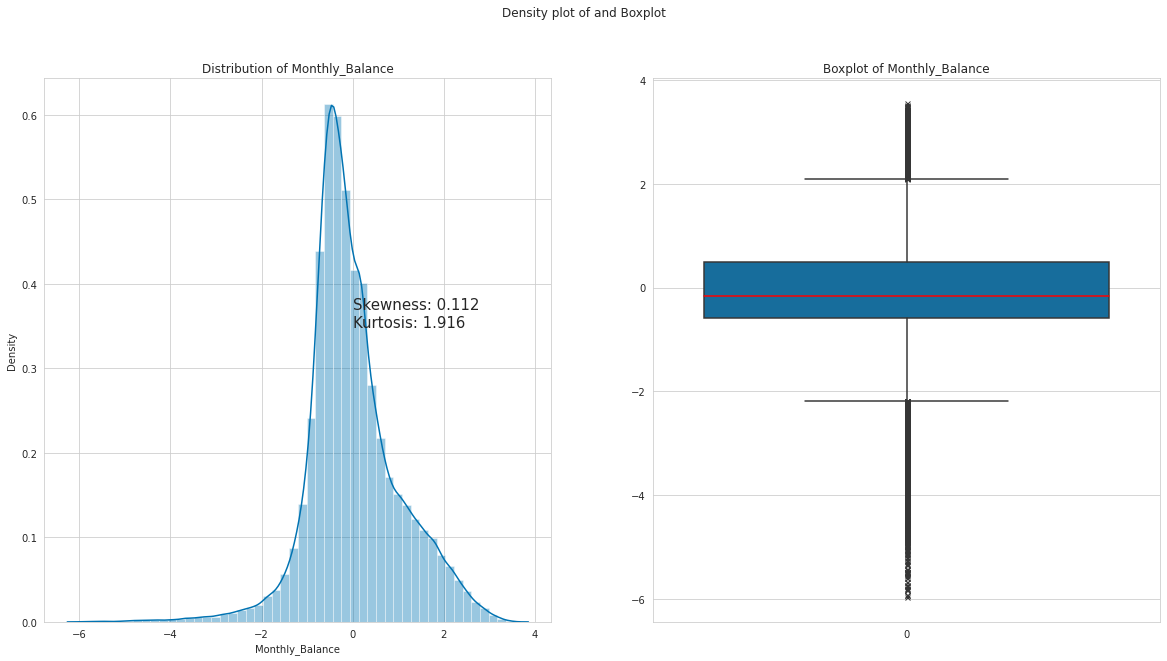

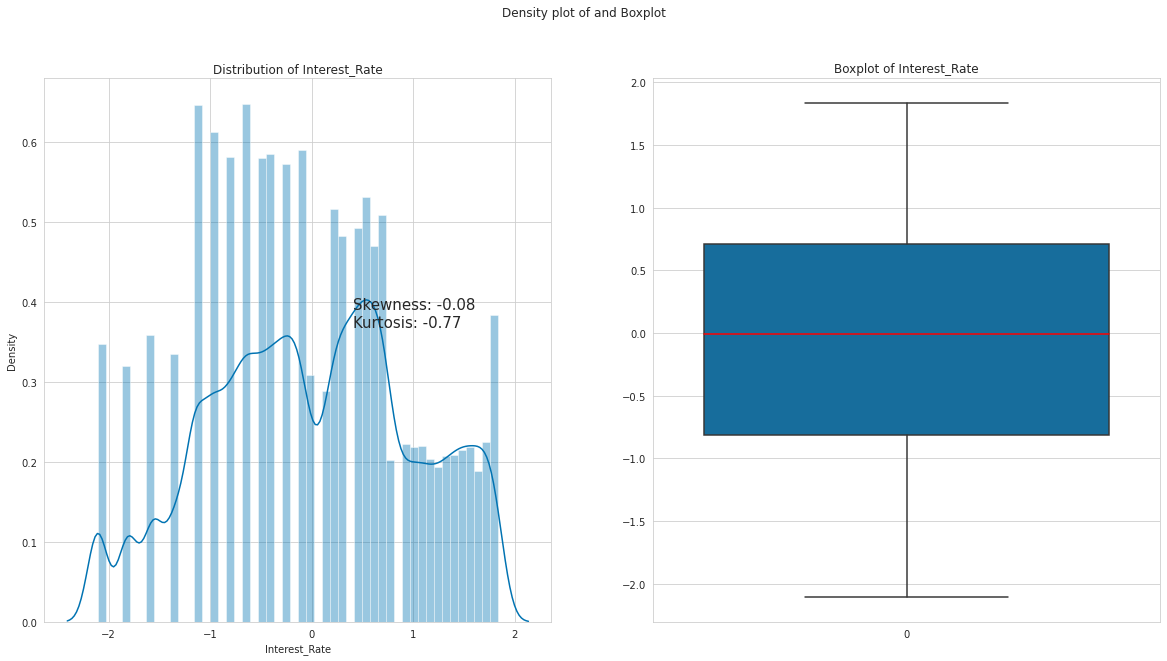

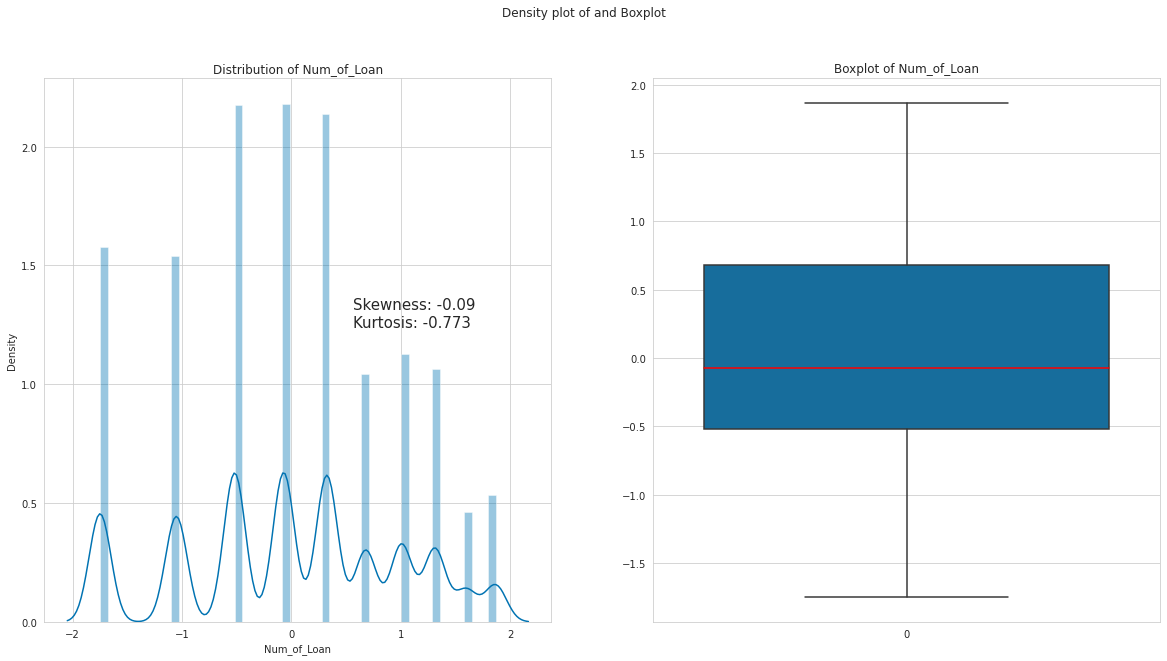

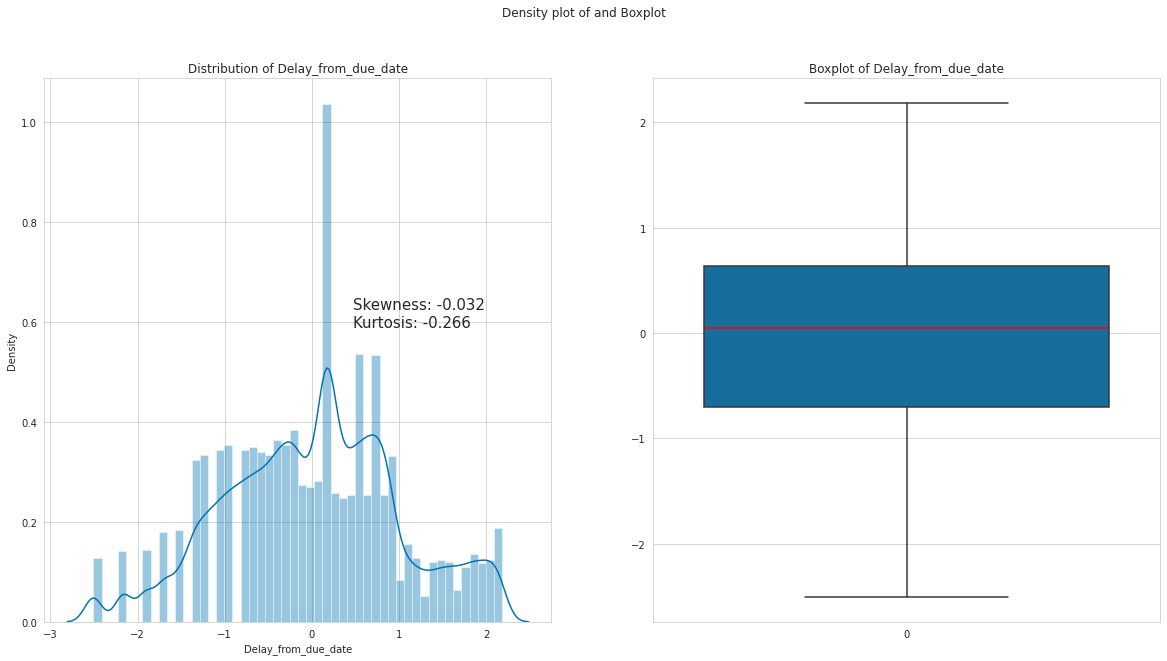

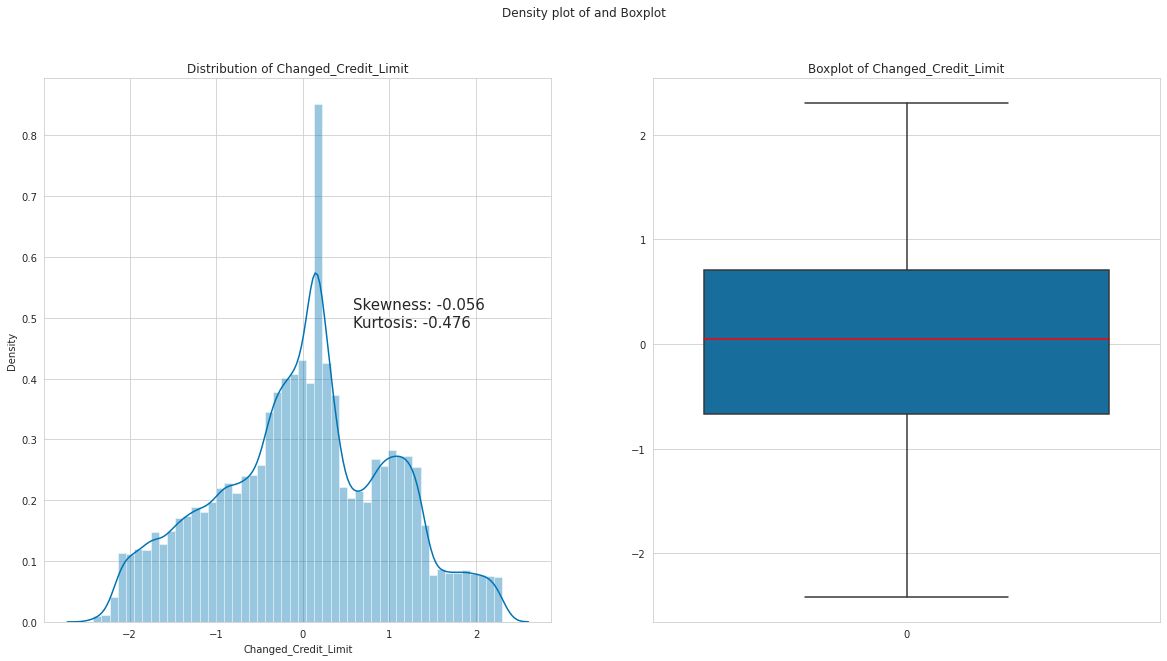

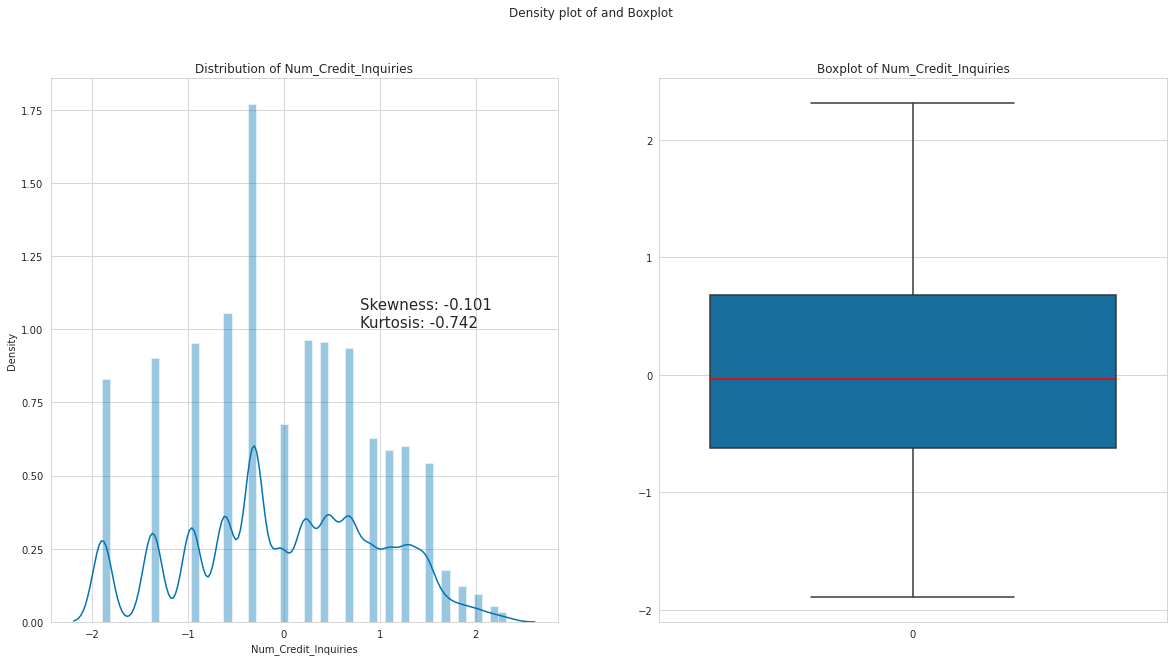

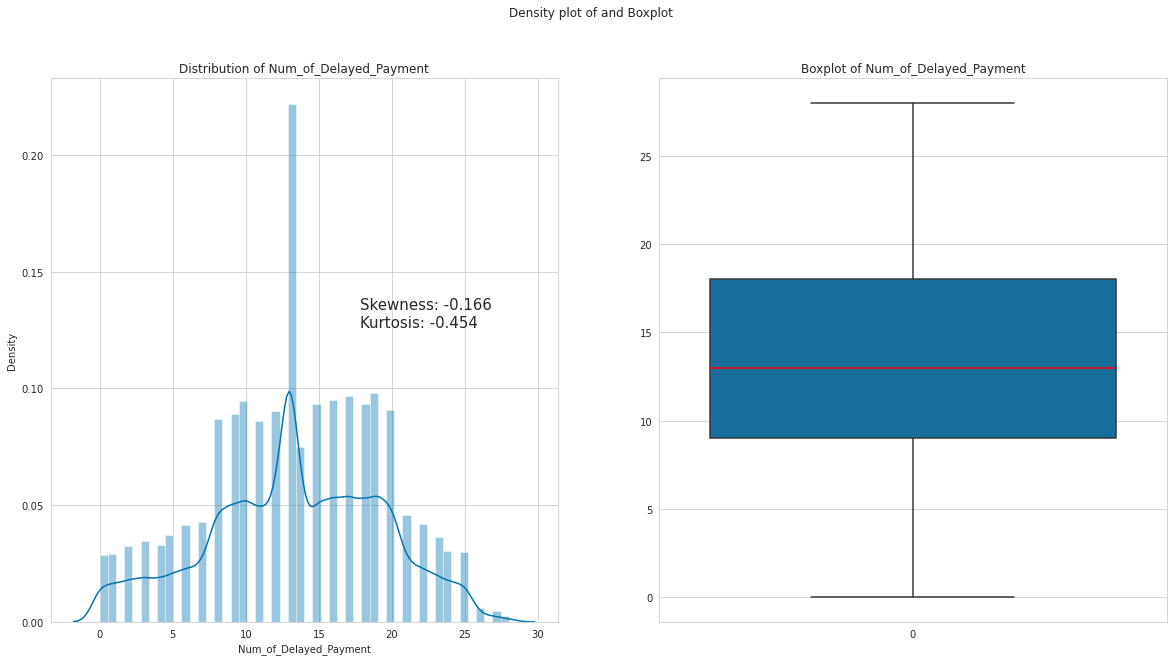

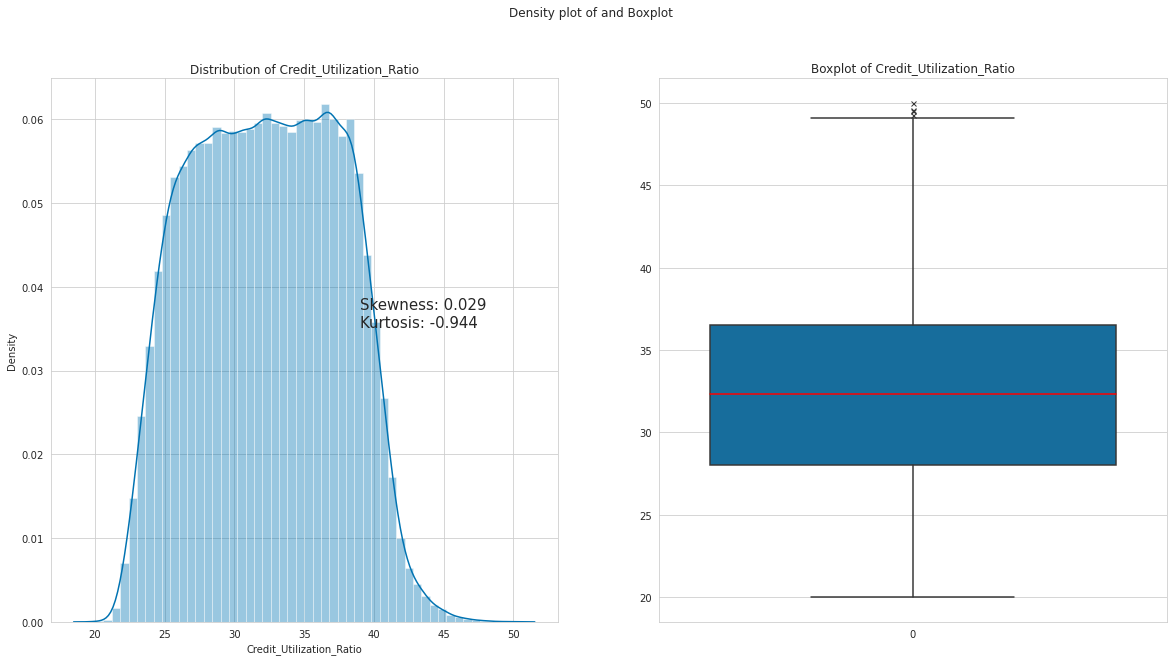

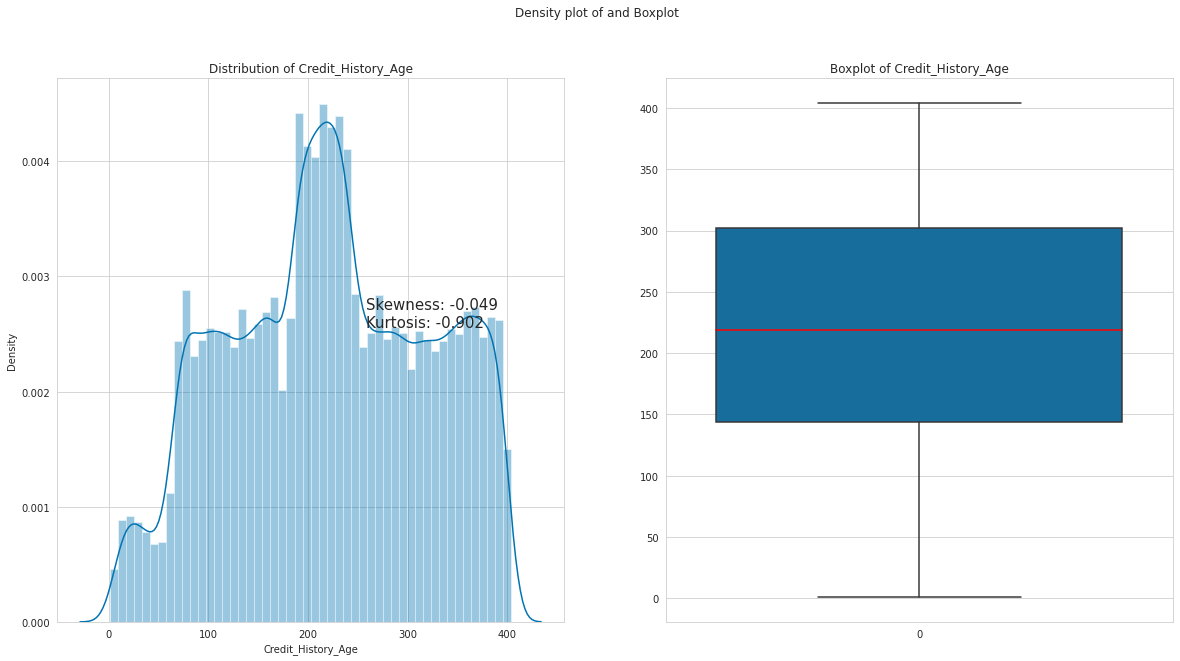

In [265]:
numeric_cols = ['Age', 'Annual_Income','Outstanding_Debt', 'Monthly_Inhand_Salary', 'Total_EMI_per_month',
                'Num_Bank_Accounts', 'Num_Credit_Card', 'Amount_invested_monthly', 'Monthly_Balance',
                'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
                'Num_of_Delayed_Payment', 'Credit_Utilization_Ratio', 'Credit_History_Age']

for col in numeric_cols:
      plt.figure(figsize=(20,10))
      plt.subplot(121)
      sns.distplot(df_train[col])
      plt.title('Distribution of ' + col)
      plt.subplot(122)
      sns.boxplot(df_train[col],
                  medianprops={"color": "red"},
                  flierprops={"marker": "x"})
      plt.title('Boxplot of ' + col)
      plt.suptitle('Density plot of and Boxplot')
      text = '''
            Skewness: {0}
            Kurtosis: {1}
             '''.format(round(df_train[col].skew(), 3), round(df_train[col].kurtosis(),3))
      plt.figtext(0.3, 0.6, text, horizontalalignment='left', verticalalignment='top', fontsize = 15)
      plt.show()

## Model Training

In [266]:
# Splitting out data for X and y
X = df_train.drop(columns=['Customer_ID', 'Age', 'Month', 'Type_of_Loan', 'Credit_Score'])
y = df_train['Credit_Score']

# As the target variable is heavily imbalanced we use SMOTE technique to balance out dataset and increase model performance.
smote = imblearn.over_sampling.SMOTE()
X,y = smote.fit_resample(X,y)

# Splitting our data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size = 0.25,
                                                    stratify = y)

ModelName = []
AccuracyScore = []
PrecisionScore = []
RecallScore = []
F1Score = []

# Write report into a txt file for further analysis
def generateReport(filename, model, class_report, acc_score, prec_sore, rec_score, f1):
    with open(filename, "a") as file:
        file.write('\n\n -#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#- \n\n')
        file.write('########## Report for the model: {} ########## \n \n'.format(model))
        file.write('------- Classification report -------- \n\n')
        file.write(str(class_report))
        file.write('-------Accuracy Score -------- \n\n')
        file.write('Accuracy score: ')
        file.write(str(acc_score))
        file.write('-------Precision Score -------- \n\n')
        file.write('Precision score: ')
        file.write(str(prec_sore))
        file.write('-------Recall Score -------- \n\n')
        file.write('Recall score: ')
        file.write(str(rec_score))
        file.write('-------F1 Score -------- \n\n')
        file.write('F1 score: ')
        file.write(str(f1))
        file.write('\n\n -#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#- \n\n')

# Train and evaluate model, append each score to a list
def train_Evaluate(filename,model, x,y,xt,yt):
    model.fit(x,y)
    y_pred = model.predict(xt)
    print('The prediction for the model {} is done and report has been generated.'.format(str(model)))
    class_report = classification_report(yt,y_pred)
    acc_score = accuracy_score(y_test,y_pred)
    prec_score = precision_score(y_test,y_pred, average='micro')
    rec_score = recall_score(y_test,y_pred, average='micro')
    f1 = f1_score(y_test,y_pred, average='micro')

    generateReport(filename,model, class_report, acc_score, prec_score, rec_score, f1)

    ModelName.append(model)
    AccuracyScore.append(acc_score)
    PrecisionScore.append(prec_score)
    RecallScore.append(rec_score)
    F1Score.append(f1)

In [267]:
# Classifiers to train and predict target label
models = [LogisticRegression(), SGDClassifier(), RidgeClassifier(), KNeighborsClassifier(),
          DecisionTreeClassifier(), GaussianNB(), BernoulliNB(), AdaBoostClassifier(), GradientBoostingClassifier(),
          ExtraTreesClassifier(), MLPClassifier(), HistGradientBoostingClassifier(),
          VotingClassifier(estimators=[('RF',RandomForestClassifier()),
                                       ('KNN',KNeighborsClassifier()),
                                       ('HIST',HistGradientBoostingClassifier())],voting='hard'),
          BaggingClassifier()
         ]

for model in models:
    train_Evaluate('model_report_unscaled.txt',model, X_train, y_train, X_test, y_test)

# Creating a dataframe for final scores for each model
ModelEvaluation = pd.DataFrame({'ModelName': ModelName, 
                                'AccuracyScore': AccuracyScore,
                                'PrecisionScore': PrecisionScore,
                                'RecallScore': RecallScore,
                                'F1Score': F1Score}).sort_values('AccuracyScore', ascending = False)

ModelEvaluation

The prediction for the model LogisticRegression() is done and report has been generated.
The prediction for the model SGDClassifier() is done and report has been generated.
The prediction for the model RidgeClassifier() is done and report has been generated.
The prediction for the model KNeighborsClassifier() is done and report has been generated.
The prediction for the model DecisionTreeClassifier() is done and report has been generated.
The prediction for the model GaussianNB() is done and report has been generated.
The prediction for the model BernoulliNB() is done and report has been generated.
The prediction for the model AdaBoostClassifier() is done and report has been generated.
The prediction for the model GradientBoostingClassifier() is done and report has been generated.
The prediction for the model ExtraTreesClassifier() is done and report has been generated.
The prediction for the model MLPClassifier() is done and report has been generated.
The prediction for the model Hist

,ModelName,AccuracyScore,PrecisionScore,RecallScore,F1Score
9,"(ExtraTreeClassifier(random_state=1637159484),...",0.866077,0.866077,0.866077,0.866077
12,"VotingClassifier(estimators=[('RF', RandomFore...",0.842105,0.842105,0.842105,0.842105
13,(DecisionTreeClassifier(random_state=796629749...,0.827336,0.827336,0.827336,0.827336
11,HistGradientBoostingClassifier(),0.801484,0.801484,0.801484,0.801484
4,DecisionTreeClassifier(),0.765051,0.765051,0.765051,0.765051
8,([DecisionTreeRegressor(criterion='friedman_ms...,0.761014,0.761014,0.761014,0.761014
3,KNeighborsClassifier(),0.760237,0.760237,0.760237,0.760237
10,MLPClassifier(),0.726160,0.726160,0.726160,0.726160
7,"(DecisionTreeClassifier(max_depth=1, random_st...",0.724856,0.724856,0.724856,0.724856
2,RidgeClassifier(),0.674181,0.674181,0.674181,0.674181


In [268]:
# Scaling our date for better performance
scaler = StandardScaler()
features = X_train.columns
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train,columns=features)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test,columns=features)

In [269]:
# Models that achieved high scores on the first unscaled version of the data
models2 = [KNeighborsClassifier(), DecisionTreeClassifier(), AdaBoostClassifier(), GradientBoostingClassifier(),
          ExtraTreesClassifier(), MLPClassifier(), HistGradientBoostingClassifier(),
          VotingClassifier(estimators=[('RF',RandomForestClassifier()),
                                       ('KNN',KNeighborsClassifier()),
                                       ('HIST',HistGradientBoostingClassifier())],voting='hard'),
          BaggingClassifier(), SVC()
         ]

ModelName = []
AccuracyScore = []
PrecisionScore = []
RecallScore = []
F1Score = []

for model in models2:
    train_Evaluate('model_report_scaled.txt',model, X_train_scaled, y_train, X_test_scaled, y_test)

ModelEvaluation2 = pd.DataFrame({'ModelName': ModelName, 
                                'AccuracyScore': AccuracyScore,
                                'PrecisionScore': PrecisionScore,
                                'RecallScore': RecallScore,
                                'F1Score': F1Score}).sort_values('AccuracyScore', ascending = False)

ModelEvaluation2

The prediction for the model KNeighborsClassifier() is done and report has been generated.
The prediction for the model DecisionTreeClassifier() is done and report has been generated.
The prediction for the model AdaBoostClassifier() is done and report has been generated.
The prediction for the model GradientBoostingClassifier() is done and report has been generated.
The prediction for the model ExtraTreesClassifier() is done and report has been generated.
The prediction for the model MLPClassifier() is done and report has been generated.
The prediction for the model HistGradientBoostingClassifier() is done and report has been generated.
The prediction for the model VotingClassifier(estimators=[('RF', RandomForestClassifier()),
                             ('KNN', KNeighborsClassifier()),
                             ('HIST', HistGradientBoostingClassifier())]) is done and report has been generated.
The prediction for the model BaggingClassifier() is done and report has been generated.

,ModelName,AccuracyScore,PrecisionScore,RecallScore,F1Score
4,"(ExtraTreeClassifier(random_state=2009896514),...",0.866678,0.866678,0.866678,0.866678
7,"VotingClassifier(estimators=[('RF', RandomFore...",0.842256,0.842256,0.842256,0.842256
8,(DecisionTreeClassifier(random_state=108874640...,0.830496,0.830496,0.830496,0.830496
6,HistGradientBoostingClassifier(),0.802437,0.802437,0.802437,0.802437
1,DecisionTreeClassifier(),0.763421,0.763421,0.763421,0.763421
3,([DecisionTreeRegressor(criterion='friedman_ms...,0.761014,0.761014,0.761014,0.761014
0,KNeighborsClassifier(),0.760237,0.760237,0.760237,0.760237
5,MLPClassifier(),0.728342,0.728342,0.728342,0.728342
2,"(DecisionTreeClassifier(max_depth=1, random_st...",0.724856,0.724856,0.724856,0.724856
9,SVC(),0.674657,0.674657,0.674657,0.674657


### Hyperparameter tuning

In [270]:
kf = KFold(n_splits = 5,
           shuffle = True)

params_dt = {   'max_depth' : [2,6,12, 18, 24],
                'min_samples_leaf' : np.linspace(0,1, 20),
                'max_features' : ['auto', 'sqrt', 'log2'],
                'criterion' : ['gini', 'entropy', 'log_loss']
            }

dt = DecisionTreeClassifier()

grid_dt = RandomizedSearchCV(estimator = dt,
                       param_distributions = params_dt,
                       scoring = 'accuracy',
                       cv = kf,
                       n_jobs = -1)

grid_dt.fit(X_train_scaled, y_train)
y_pred = grid_dt.predict(X_test_scaled)
print(classification_report(y_test,y_pred))
print('-------Accuracy Score --------')
print(accuracy_score(y_test,y_pred),'\n')
print('------- Best Score --------')
print('Best score: ', grid_dt.best_score_,'\n')
print('------- Best Parameters --------')
print('Best parameters are: ', grid_dt.best_params_,'\n')


              precision    recall  f1-score   support

         0.0       0.60      0.79      0.69     13294
         1.0       0.72      0.42      0.53     13293
         2.0       0.48      0.53      0.50     13294

    accuracy                           0.58     39881
   macro avg       0.60      0.58      0.57     39881
weighted avg       0.60      0.58      0.57     39881

-------Accuracy Score --------
0.5790225922118302 

------- Best Score --------
Best score:  0.6345734247471964 

------- Best Parameters --------
Best parameters are:  {'min_samples_leaf': 0.10526315789473684, 'max_features': 'auto', 'max_depth': 12, 'criterion': 'gini'} 



In [271]:
params_hist = { 'max_depth' : np.linspace(2,40,2),
                'min_samples_leaf' : np.linspace(0, 100, 20),
                'learning_rate' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
                'max_iter' : [100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900]
            }

hist = HistGradientBoostingClassifier()

grid_hist = RandomizedSearchCV(estimator = hist,
                              param_distributions = params_hist,
                              scoring = 'accuracy',
                              cv = kf,
                              n_jobs = -1)

grid_hist.fit(X_train_scaled, y_train)
y_pred = grid_hist.predict(X_test_scaled)
print(classification_report(y_test,y_pred))
print('------- Accuracy Score --------')
print(accuracy_score(y_test,y_pred),'\n')
print('------- Best Score --------')
print('Best score: ', grid_hist.best_score_,'\n')
print('------- Best Parameters --------')
print('Best parameters are: ', grid_hist.best_params_,'\n')


              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88     13294
         1.0       0.86      0.85      0.85     13293
         2.0       0.80      0.79      0.79     13294

    accuracy                           0.84     39881
   macro avg       0.84      0.84      0.84     39881
weighted avg       0.84      0.84      0.84     39881

------- Accuracy Score --------
0.8432085454226323 

------- Best Score --------
Best score:  0.8392608107661191 

------- Best Parameters --------
Best parameters are:  {'min_samples_leaf': 68.42105263157896, 'max_iter': 400, 'max_depth': 40.0, 'learning_rate': 0.4} 



In [272]:
params_logreg = { 'penalty': ['l1','l2','elasticnet'],
                'C': [0.001,0.01,0.1,0.5],
                'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                'multi_class': ['ovr', 'multinomial'],
                'l1_ratio': [0.2,0.5,0.8]
             }

logreg = LogisticRegression()

grid_logreg = RandomizedSearchCV(estimator = logreg,
                                 param_distributions = params_logreg,
                                 scoring = 'accuracy',
                                 cv = kf,
                                 n_jobs = -1)

grid_logreg.fit(X_train_scaled, y_train)
y_pred = grid_logreg.predict(X_test_scaled)
print(classification_report(y_test,y_pred))
print('------- Accuracy Score --------')
print('Accuracy: ',accuracy_score(y_test,y_pred),'\n')
print('------- Best Score --------')
print('Best score: ', grid_logreg.best_score_,'\n')
print('------- Best Parameters --------')
print('Best parameters are: ', grid_logreg.best_params_)


              precision    recall  f1-score   support

         0.0       0.67      0.81      0.74     13294
         1.0       0.71      0.72      0.72     13293
         2.0       0.64      0.49      0.56     13294

    accuracy                           0.68     39881
   macro avg       0.67      0.68      0.67     39881
weighted avg       0.67      0.68      0.67     39881

------- Accuracy Score --------
Accuracy:  0.6763120282841454 

------- Best Score --------
Best score:  0.6739913867977789 

------- Best Parameters --------
Best parameters are:  {'solver': 'liblinear', 'penalty': 'l1', 'multi_class': 'ovr', 'l1_ratio': 0.5, 'C': 0.5}


In [273]:
hist = HistGradientBoostingClassifier(max_depth = 40,
                                      max_iter = 400,
                                      learning_rate = 0.1,
                                      min_samples_leaf = 100)
bc = BaggingClassifier(base_estimator = hist,
                       n_estimators = 300,
                       n_jobs = -1)
bc.fit(X_train_scaled, y_train)
y_pred = bc.predict(X_test_scaled)
print(classification_report(y_test,y_pred))
print('-------Accuracy Score --------')
print(accuracy_score(y_test,y_pred))


              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88     13294
         1.0       0.86      0.83      0.85     13293
         2.0       0.81      0.79      0.80     13294

    accuracy                           0.84     39881
   macro avg       0.84      0.84      0.84     39881
weighted avg       0.84      0.84      0.84     39881

-------Accuracy Score --------
0.841553622025526
